# Hello PCA Feature Extraction

In [ ]:
# Prerequisites & Dependencies
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 600   # Plot with 600 dpi resolution

### Load Point Cloud with Pandas

In [4]:
pc = pd.read_csv("point_clouds_public/lidar_dbscan_clusters.xyz",
                 delimiter=';', names=['X','Y','Z','Label'], header=None)

pc['Label'] = pc['Label'].astype(int)
print("Shape: ", pc.shape)
pc.head()

Shape:  (47894, 4)


X      Y      Z  Label
0  22.961000  0.068  0.986      1
1  23.191000  0.141  0.993      1
2  23.252001  0.178  0.995      1
3  23.313999  0.252  0.998      1
4  23.389000  0.327  1.000      1

### Prepare Clusters by Splitting Dataframe into Groups

In [5]:
segments = pc.groupby(['Label'])

In [6]:
segments.get_group(2)

C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\2837346487.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  segments.get_group(2)


X      Y      Z  Label
50     21.809000  3.273  0.955      2
51     21.740999  3.298  0.953      2
52     21.663000  3.356  0.950      2
53     21.636999  3.421  0.950      2
54     21.624001  3.489  0.950      2
...          ...    ...    ...    ...
30984  21.451000  3.338 -1.292      2
30987  21.419001  3.540 -1.292      2
30988  21.445000  3.613 -1.294      2
30989  21.573000  3.704 -1.304      2
30990  21.662001  3.790 -1.311      2

[170 rows x 4 columns]

### Apply operations to segments

In [18]:
CLUSTER_NUM = 3

cluster = segments.get_group(CLUSTER_NUM)[['X','Y','Z']]
cluster.head()

C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\3377724848.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  cluster = segments.get_group(CLUSTER_NUM)[['X','Y','Z']]


X      Y      Z
59  27.231001  4.797  1.144
60  27.313999  4.900  1.147
61  27.252001  4.977  1.146
62  27.271000  5.069  1.147
63  27.309999  5.165  1.149

In [16]:
# Compute mean and center
mean = np.mean(cluster, axis=0)
print("mean:\n", mean)

cluster_norm = cluster - mean

covariance = np.cov(cluster_norm.T)
eigen_val, eigen_vec = np.linalg.eig(covariance.T)

print("Eigen Values:\n", eigen_val)
print("Eigen Vector:\n", eigen_vec)

sorted_indexes = np.argsort(eigen_val)[::-1]
eigen_val = eigen_val[sorted_indexes]
eigen_vec = eigen_vec[:, sorted_indexes]

print("Sorted Eigen Values:\n", eigen_val)
print("Sorted Eigen Vector:\n", eigen_vec)

mean:
 X    27.861099
Y     6.007989
Z     0.144815
dtype: float64
Eigen Values:
 [1.21551036 0.04563334 0.37245377]
Eigen Vector:
 [[ 0.49622091  0.85470047 -0.15248582]
 [ 0.77610363 -0.5154117  -0.36333722]
 [ 0.38913747 -0.06195073  0.9190942 ]]
Sorted Eigen Values:
 [1.21551036 0.37245377 0.04563334]
Sorted Eigen Vector:
 [[ 0.49622091 -0.15248582  0.85470047]
 [ 0.77610363 -0.36333722 -0.5154117 ]
 [ 0.38913747  0.9190942  -0.06195073]]


### 3D Plot

C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\2032601237.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.quiver(mean[0], mean[1], mean[2], u[0], u[1], u[2], color='salmon')
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\2032601237.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.quiver(mean[0], mean[1], mean[2], v[0], v[1], v[2], color='royalblue')
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\2032601237.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

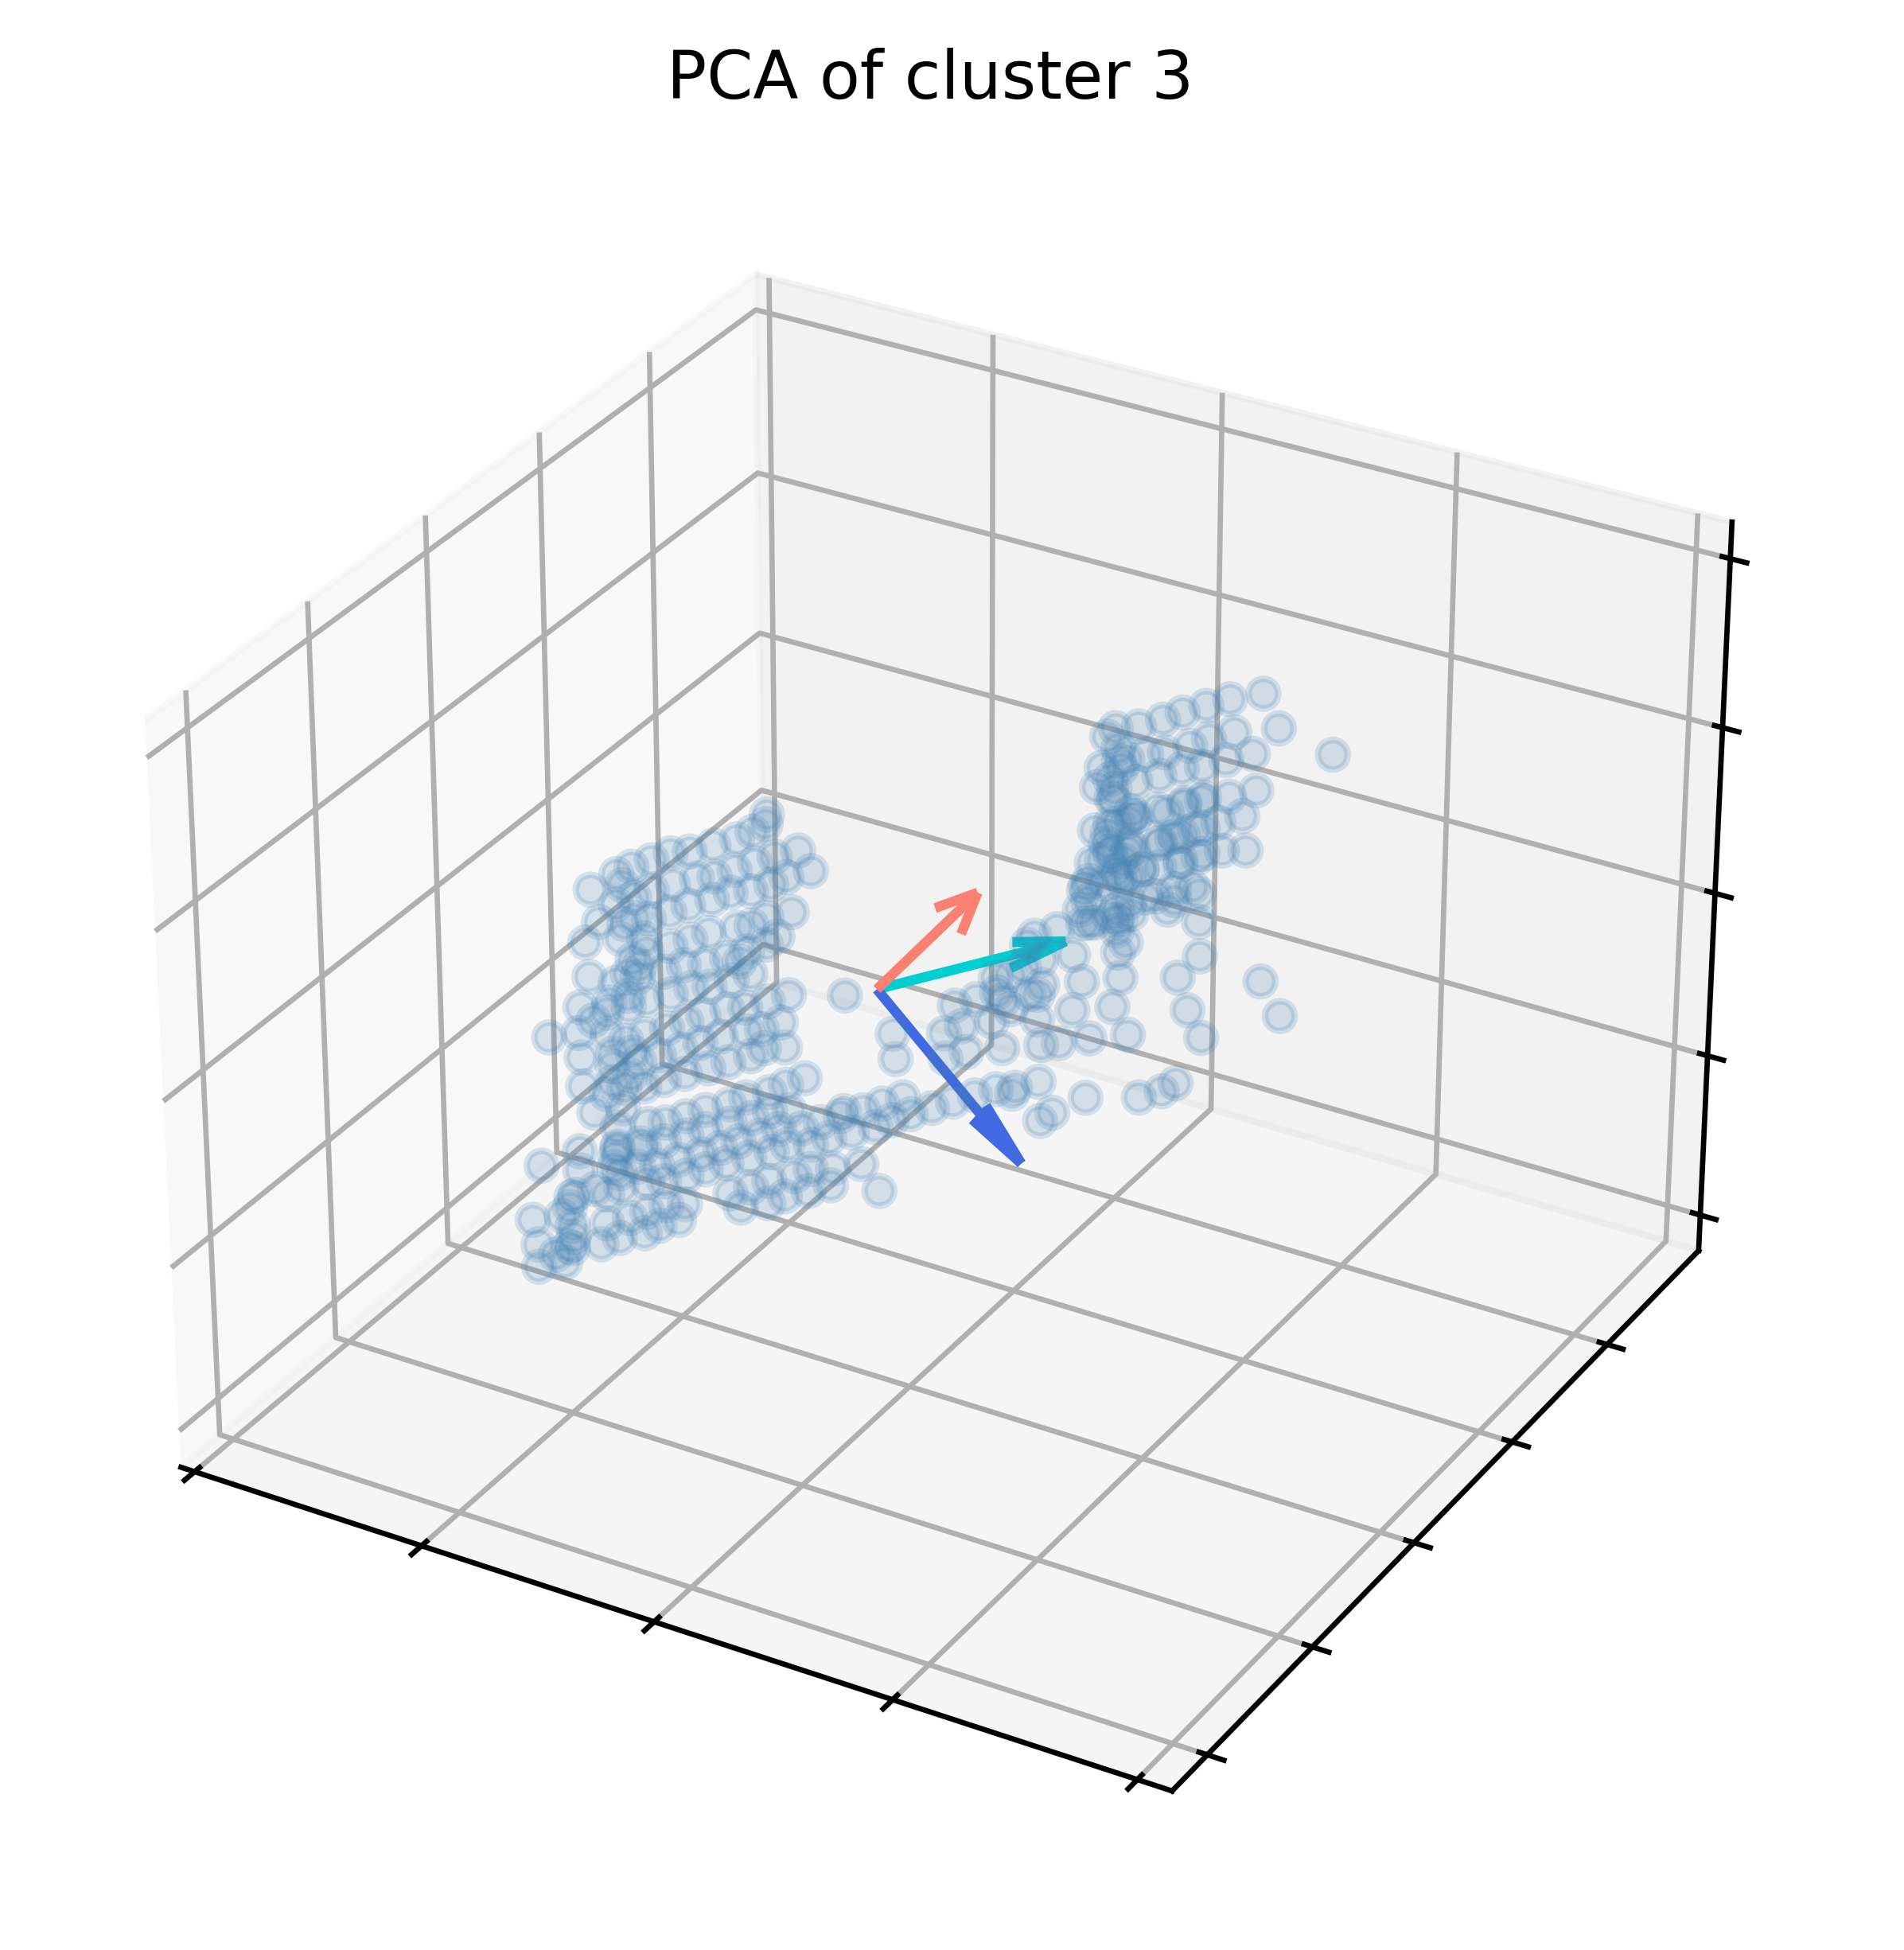

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim([min(cluster['X'])-1, max(cluster['X']+1)])
ax.set_ylim([min(cluster['Y'])-1, max(cluster['Y']+1)])
ax.set_zlim([min(cluster['Z'])-1, max(cluster['Z']+1)])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_title(f"PCA of cluster {CLUSTER_NUM}", fontsize = 10)

# Plot PCA Results in 3D
u = eigen_vec[0]
v = eigen_vec[1]
w = eigen_vec[2]

# Plot Cluster points
ax.scatter(cluster['X'], cluster['Y'], cluster['Z'], color='steelblue', alpha=0.2)

# Plot Eigen Vectors as arrows
ax.quiver(mean[0], mean[1], mean[2], u[0], u[1], u[2], color='salmon')
ax.quiver(mean[0], mean[1], mean[2], v[0], v[1], v[2], color='royalblue')
ax.quiver(mean[0], mean[1], mean[2], w[0], w[1], w[2], color='darkturquoise')


### Helper Functions

In [27]:
def DrawPCA(points, cluster_id):
    # Compute mean and center
    mean = np.mean(points, axis=0)
    cluster_norm = points - mean

    covariance = np.cov(cluster_norm.T)
    eigen_val, eigen_vec = np.linalg.eig(covariance.T)

    sorted_indexes = np.argsort(eigen_val)[::-1]
    eigen_val = eigen_val[sorted_indexes]
    eigen_vec = eigen_vec[:, sorted_indexes]


    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim([min(cluster['X'])-1, max(cluster['X']+1)])
    ax.set_ylim([min(cluster['Y'])-1, max(cluster['Y']+1)])
    ax.set_zlim([min(cluster['Z'])-1, max(cluster['Z']+1)])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_title(f"PCA of cluster {cluster_id}", fontsize = 10)

    # Plot PCA Results in 3D
    u = eigen_vec[0]
    v = eigen_vec[1]
    w = eigen_vec[2]

    # Plot Cluster points
    ax.scatter(cluster['X'], cluster['Y'], cluster['Z'], color='steelblue', alpha=0.2)

    # Plot Eigen Vectors as arrows
    ax.quiver(mean[0], mean[1], mean[2], u[0], u[1], u[2], color='salmon')
    ax.quiver(mean[0], mean[1], mean[2], v[0], v[1], v[2], color='royalblue')
    ax.quiver(mean[0], mean[1], mean[2], w[0], w[1], w[2], color='darkturquoise')

    return


def CalcPCA(points):
    # Compute mean and center
    mean = np.mean(points, axis=0)
    cluster_norm = points - mean

    covariance = np.cov(cluster_norm.T)
    eigen_val, eigen_vec = np.linalg.eig(covariance.T)

    sorted_indexes = np.argsort(eigen_val)[::-1]
    eigen_val = eigen_val[sorted_indexes]
    eigen_vec = eigen_vec[:, sorted_indexes]

    return eigen_val, eigen_vec

### Loop over segments and export images with PCA vectors

C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\977142694.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  cluster = segments.get_group(i)[['X', 'Y', 'Z']]
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\3212764391.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.quiver(mean[0], mean[1], mean[2], u[0], u[1], u[2], color='salmon')
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\3212764391.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.quiver(mean

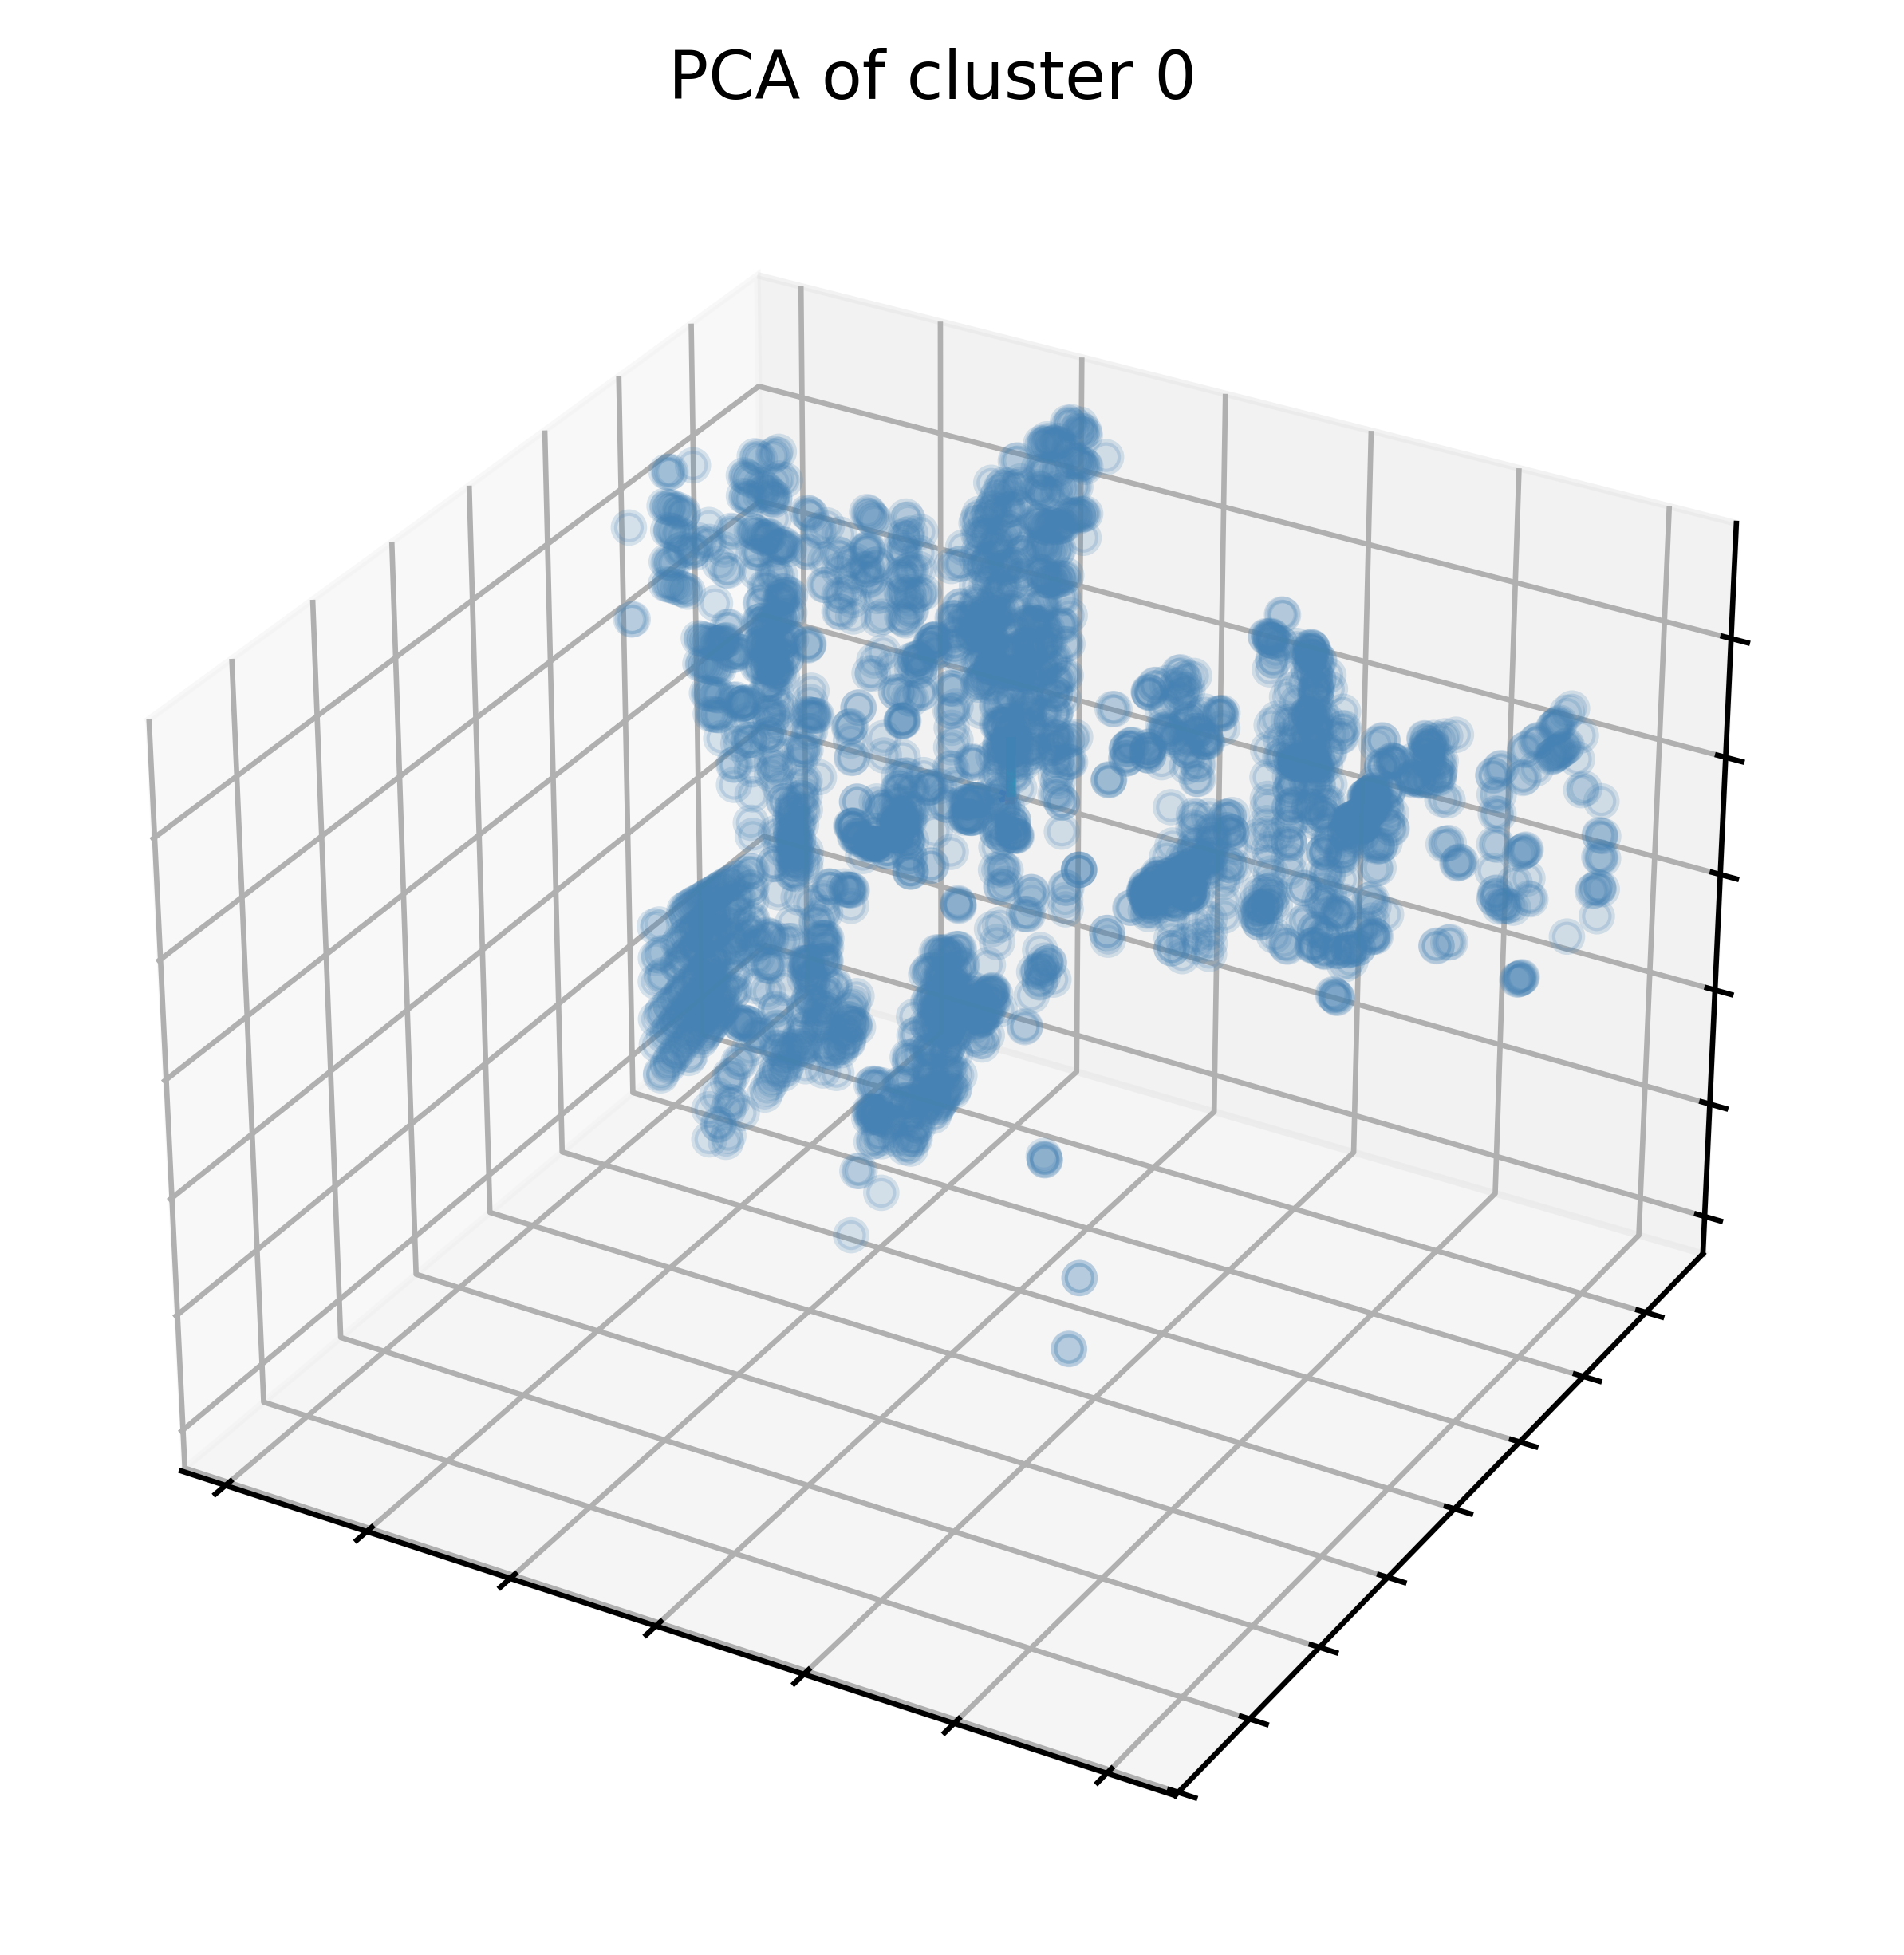

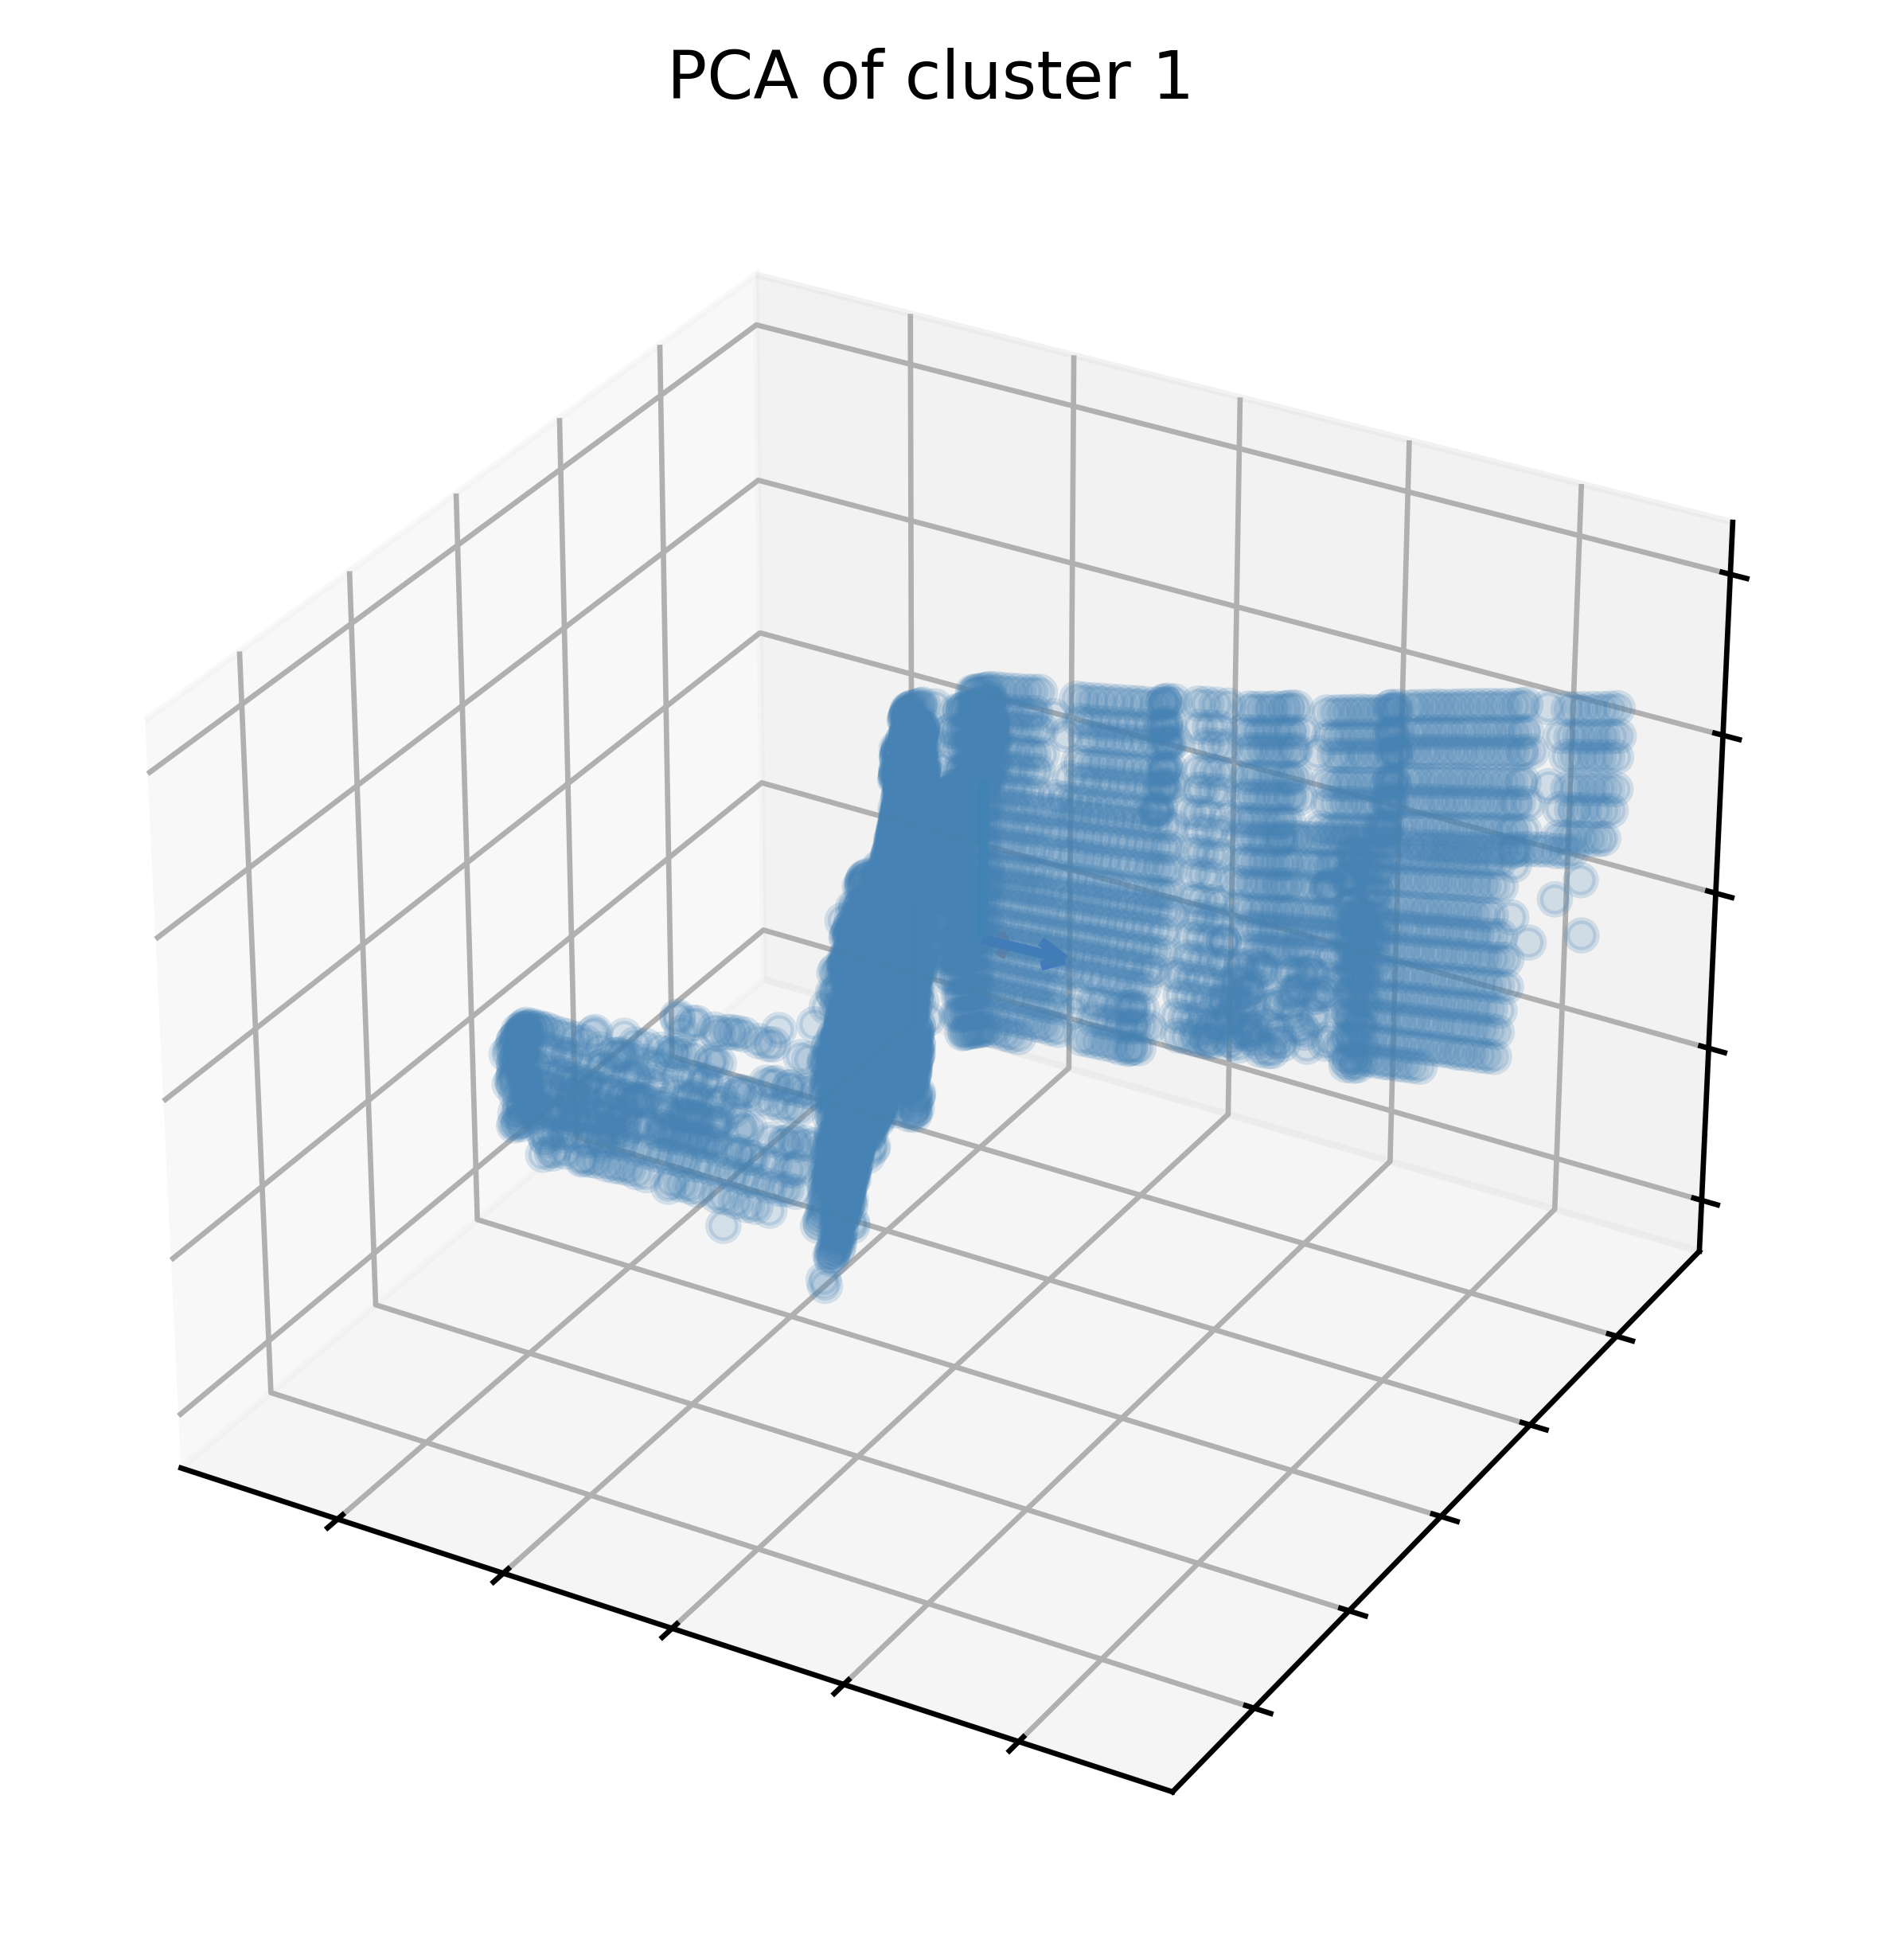

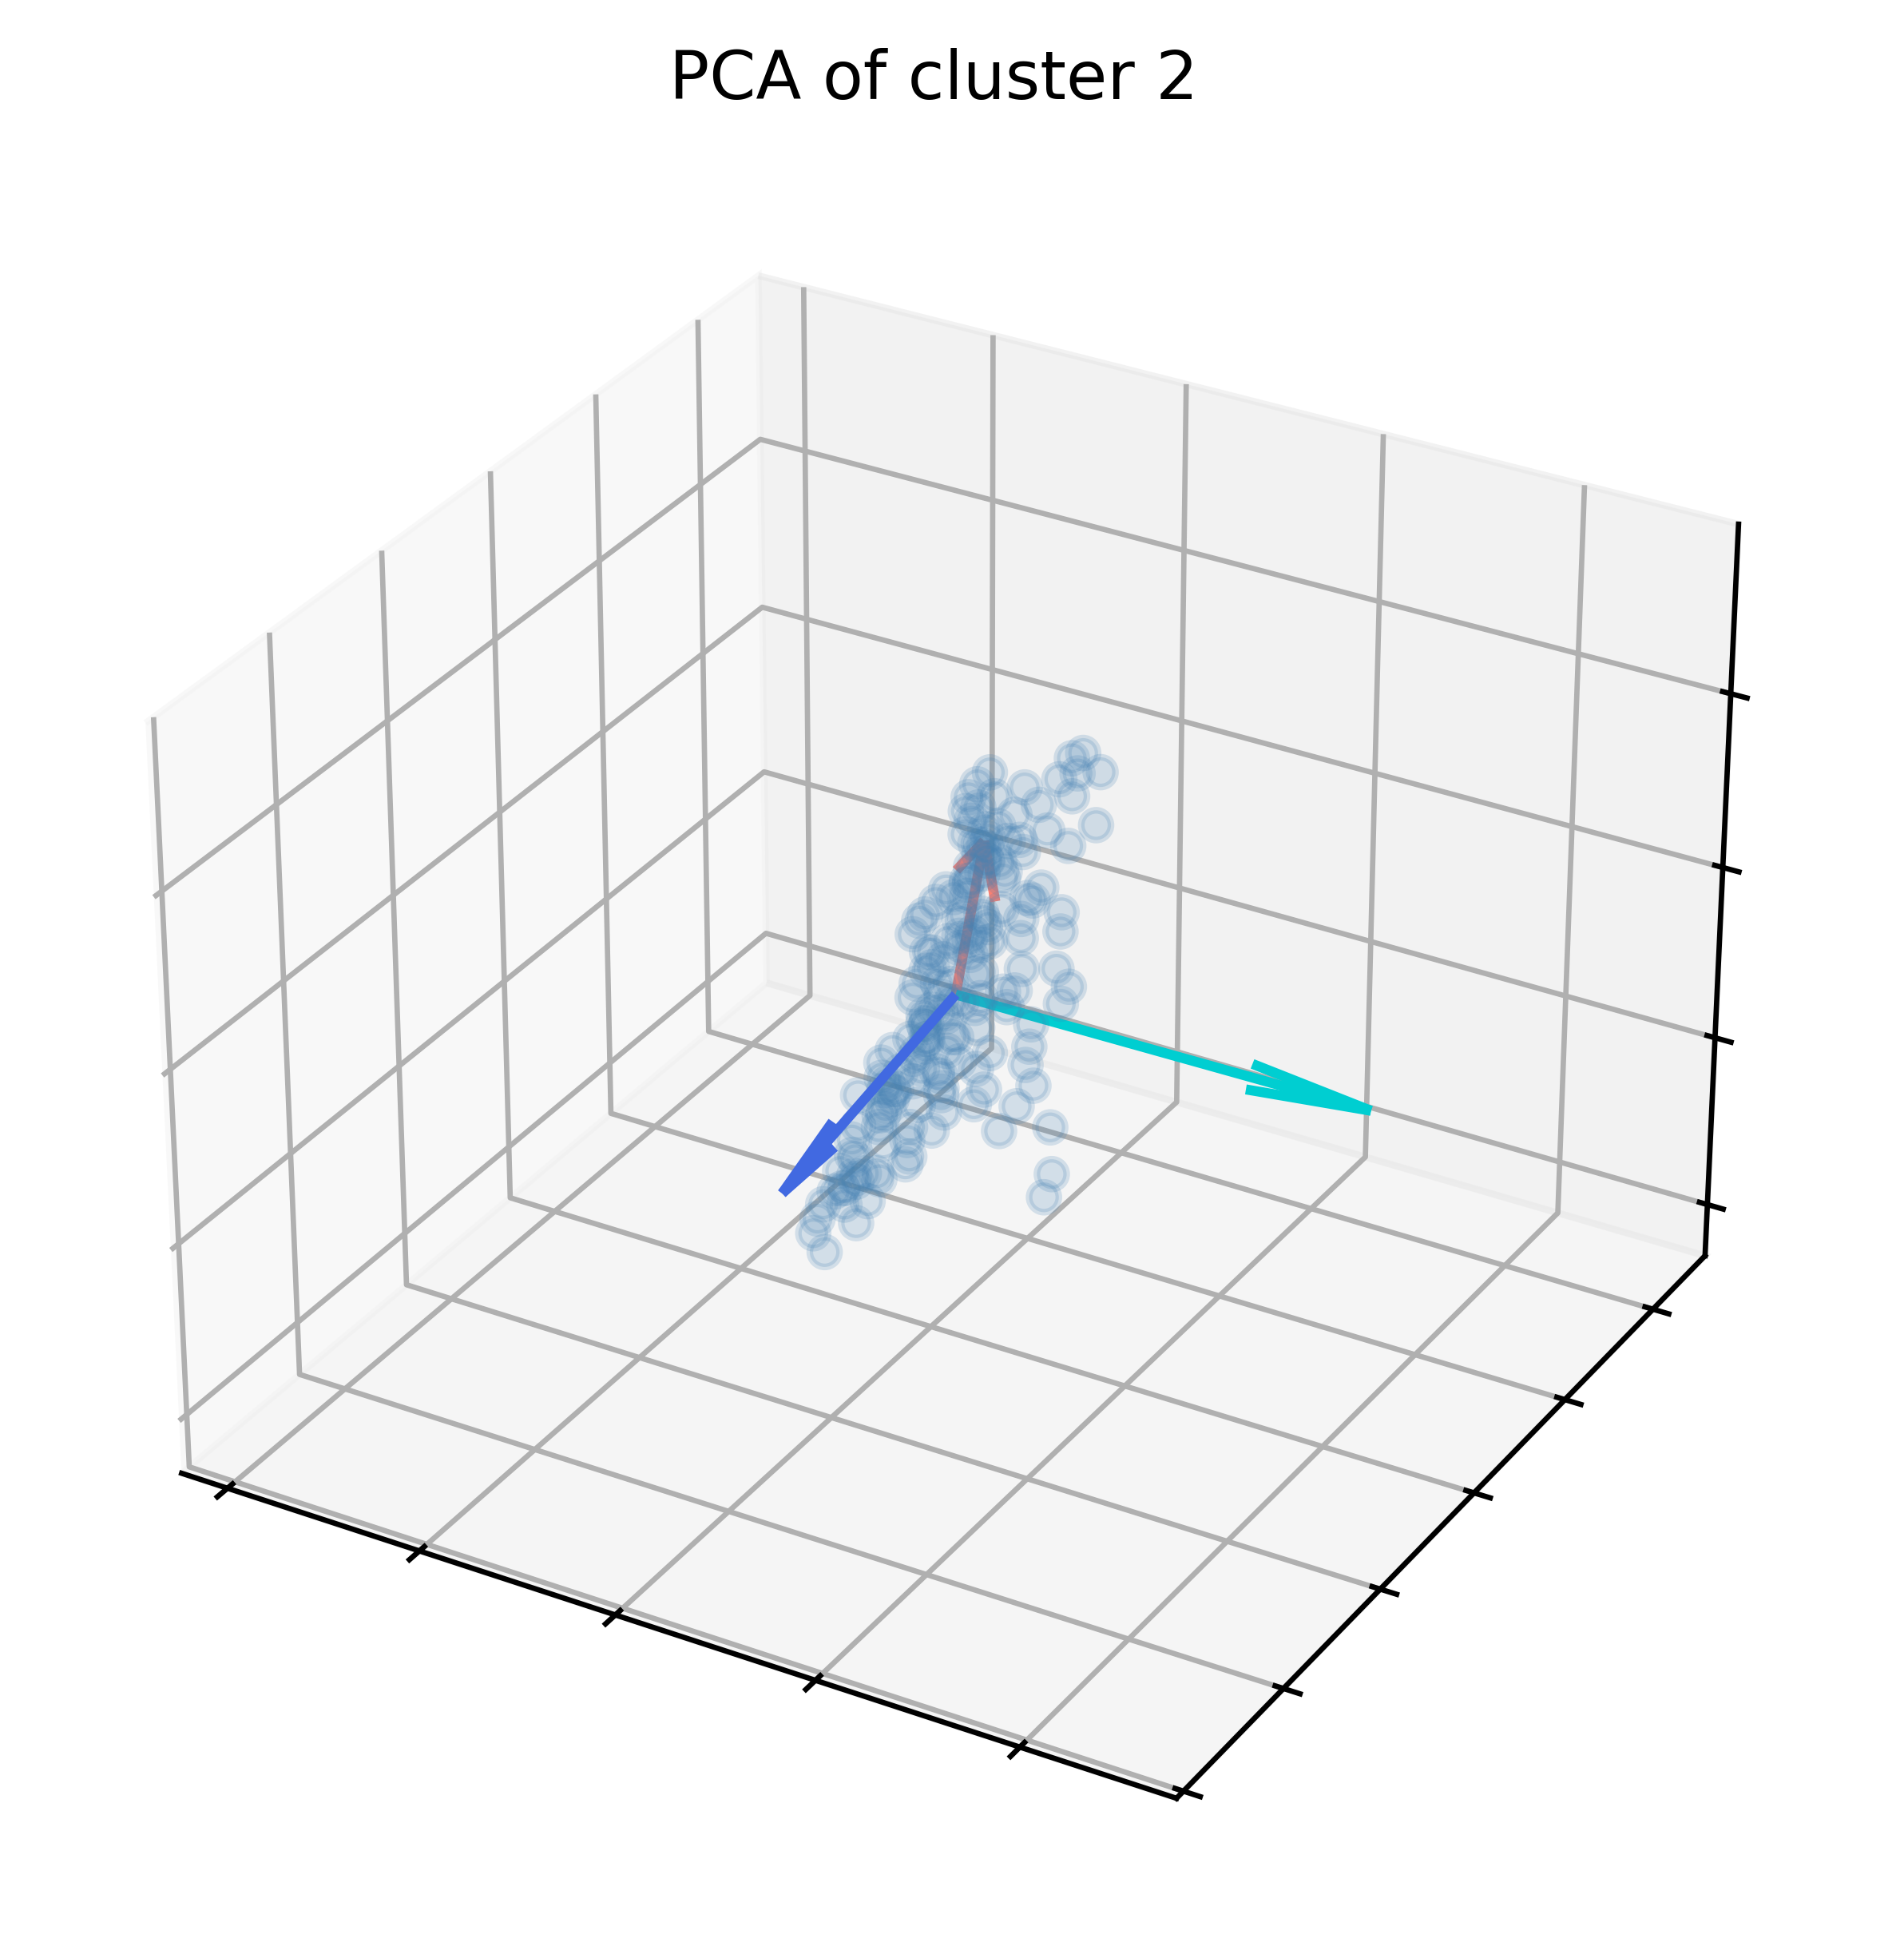

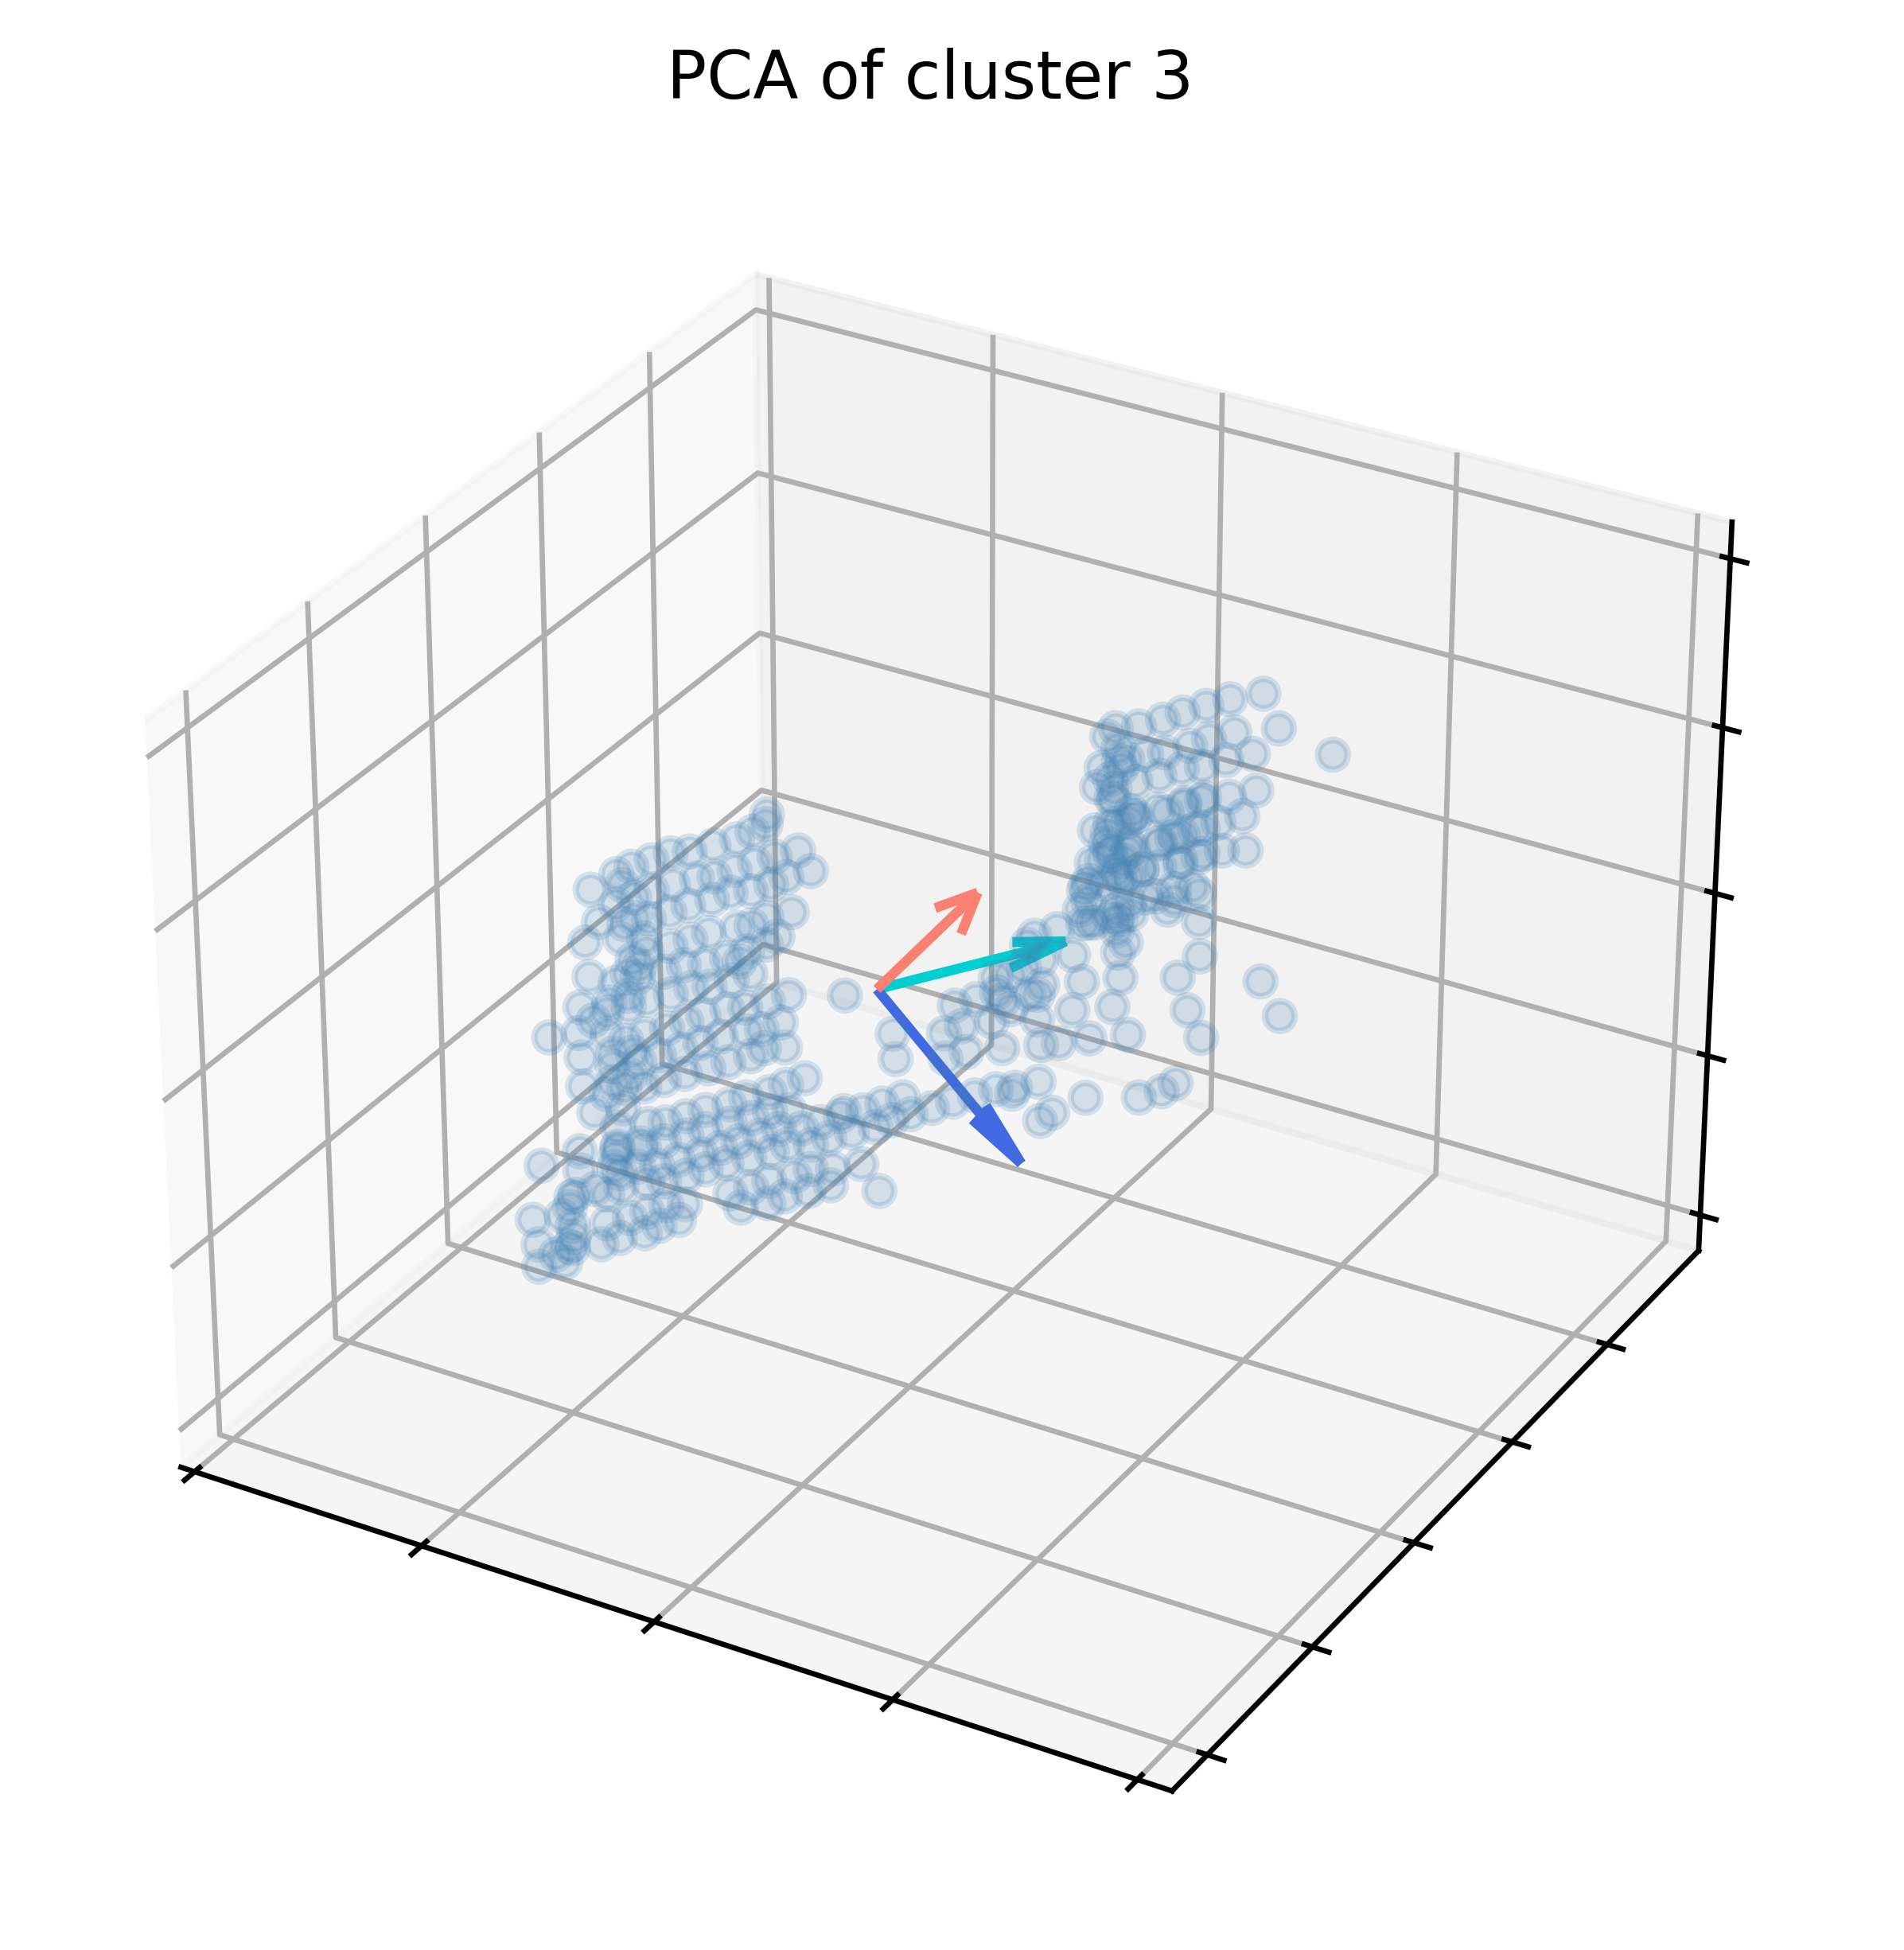

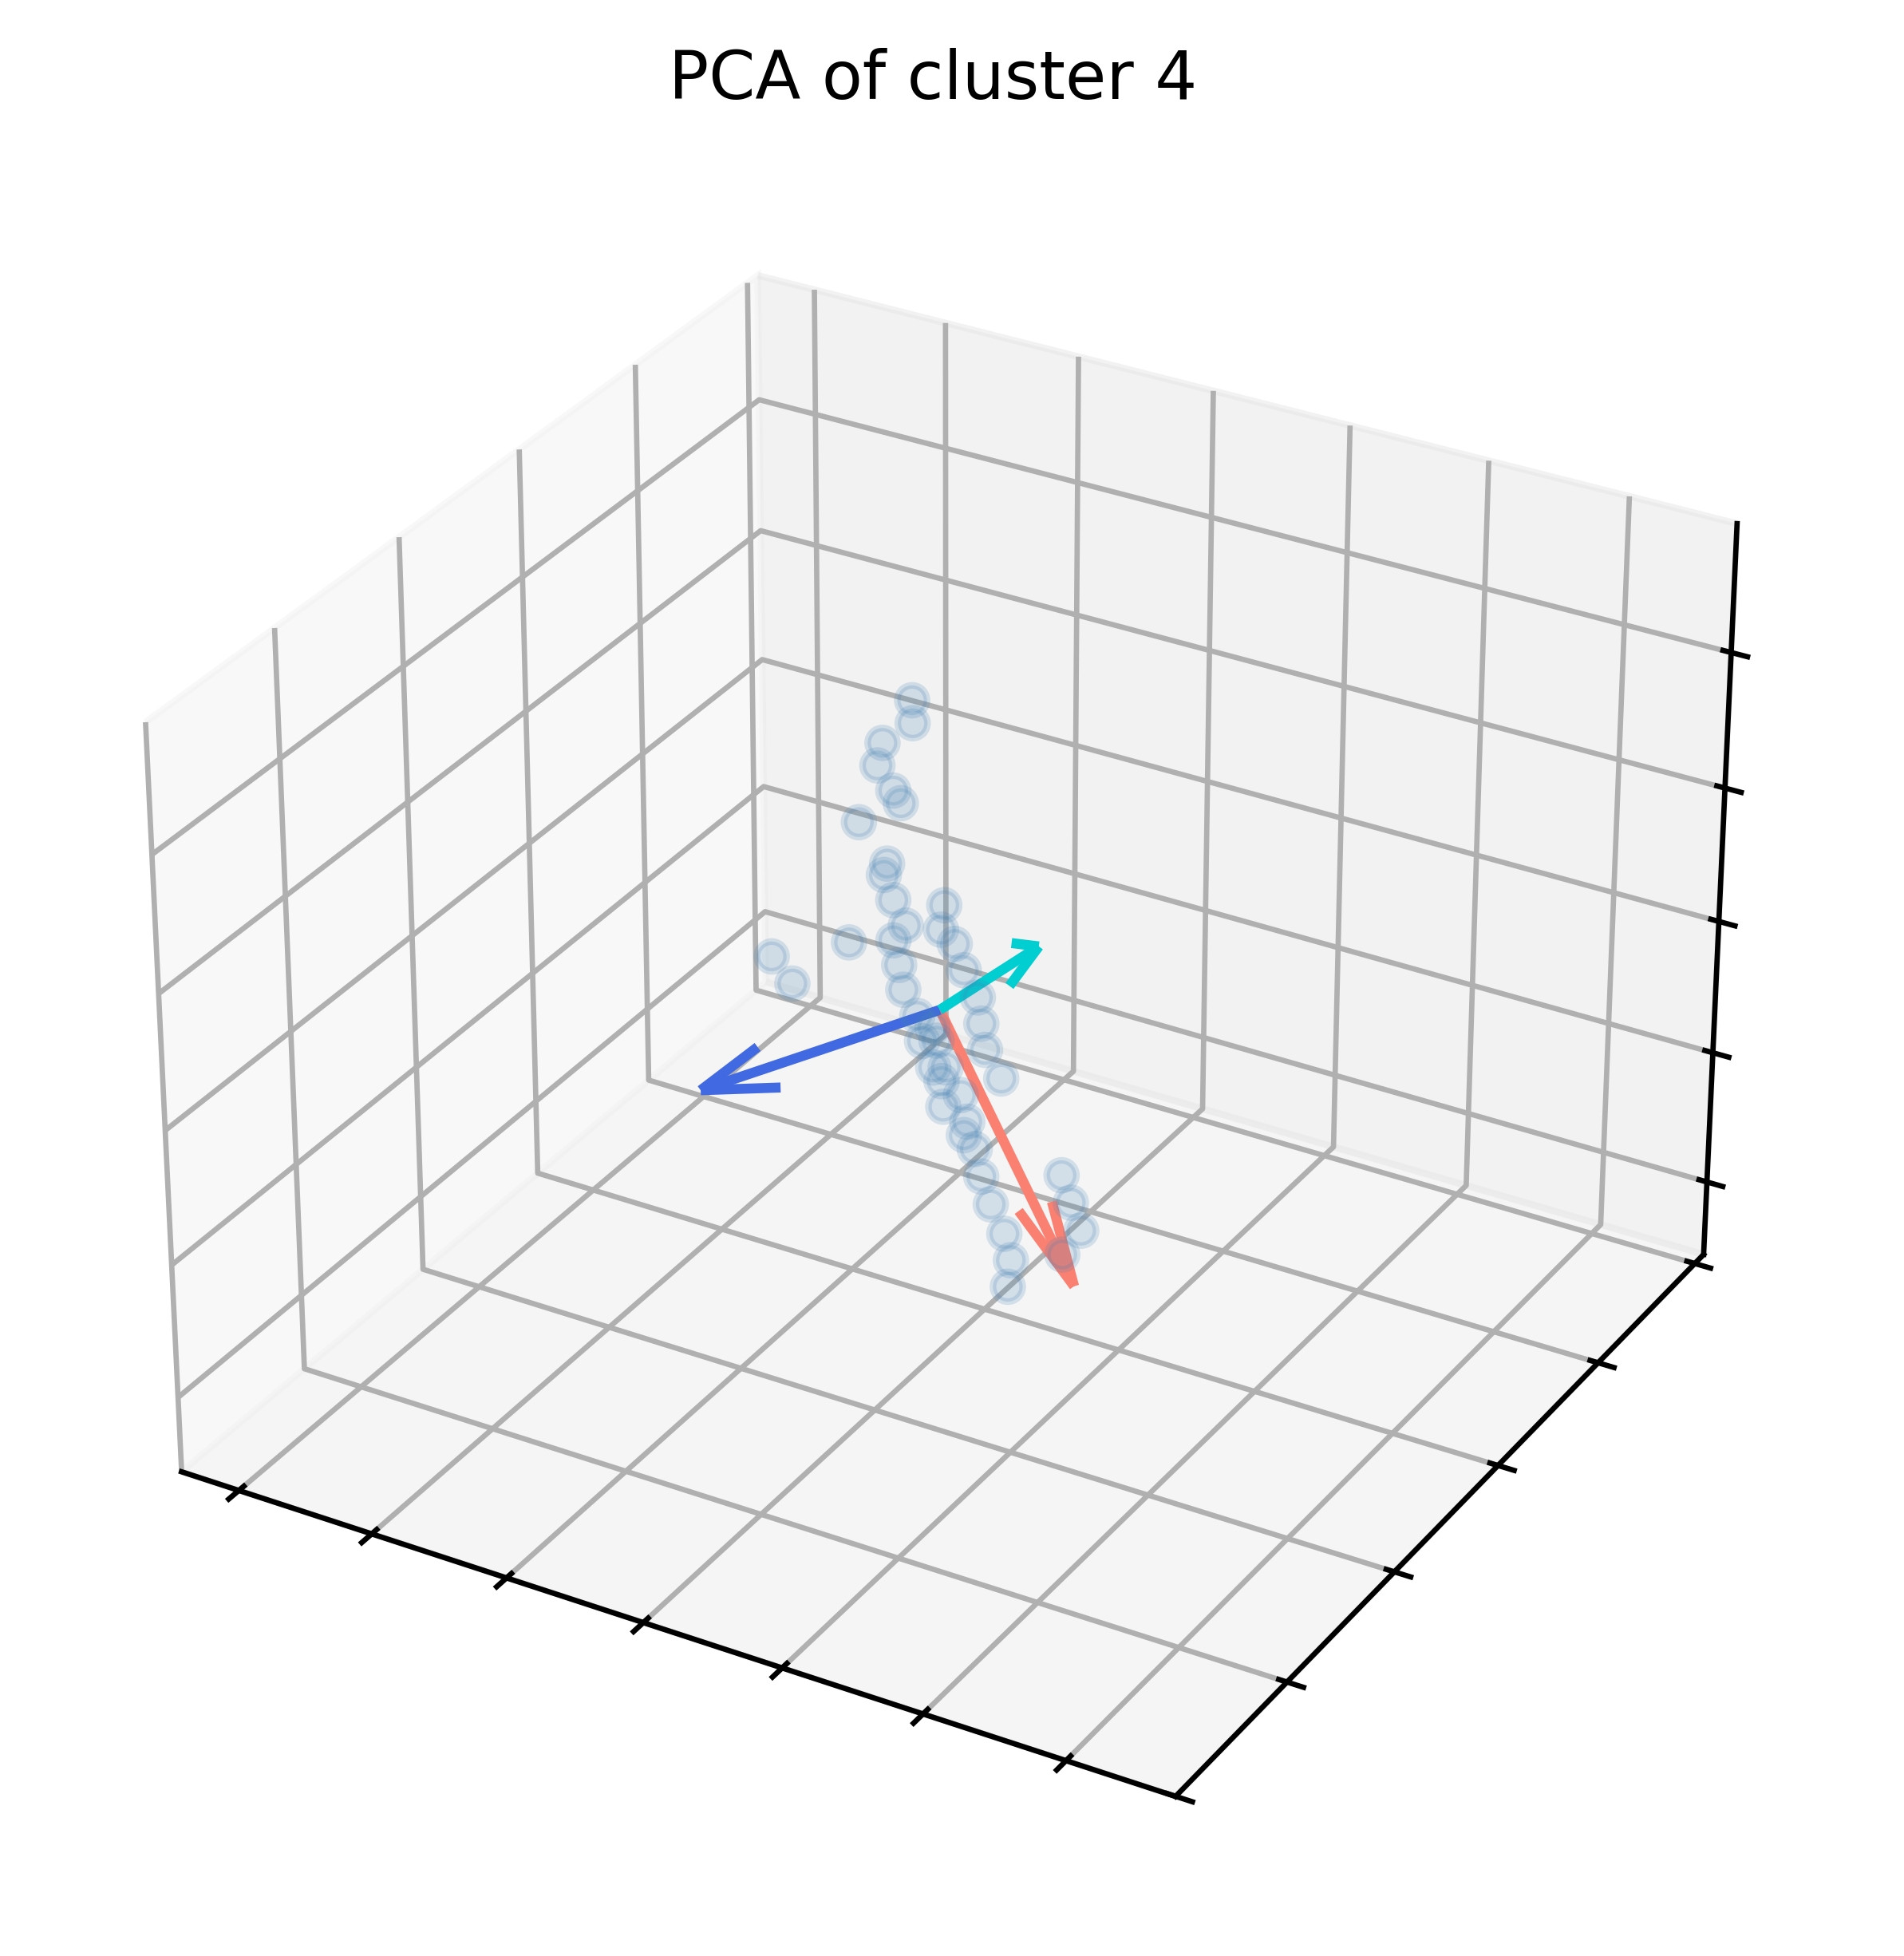

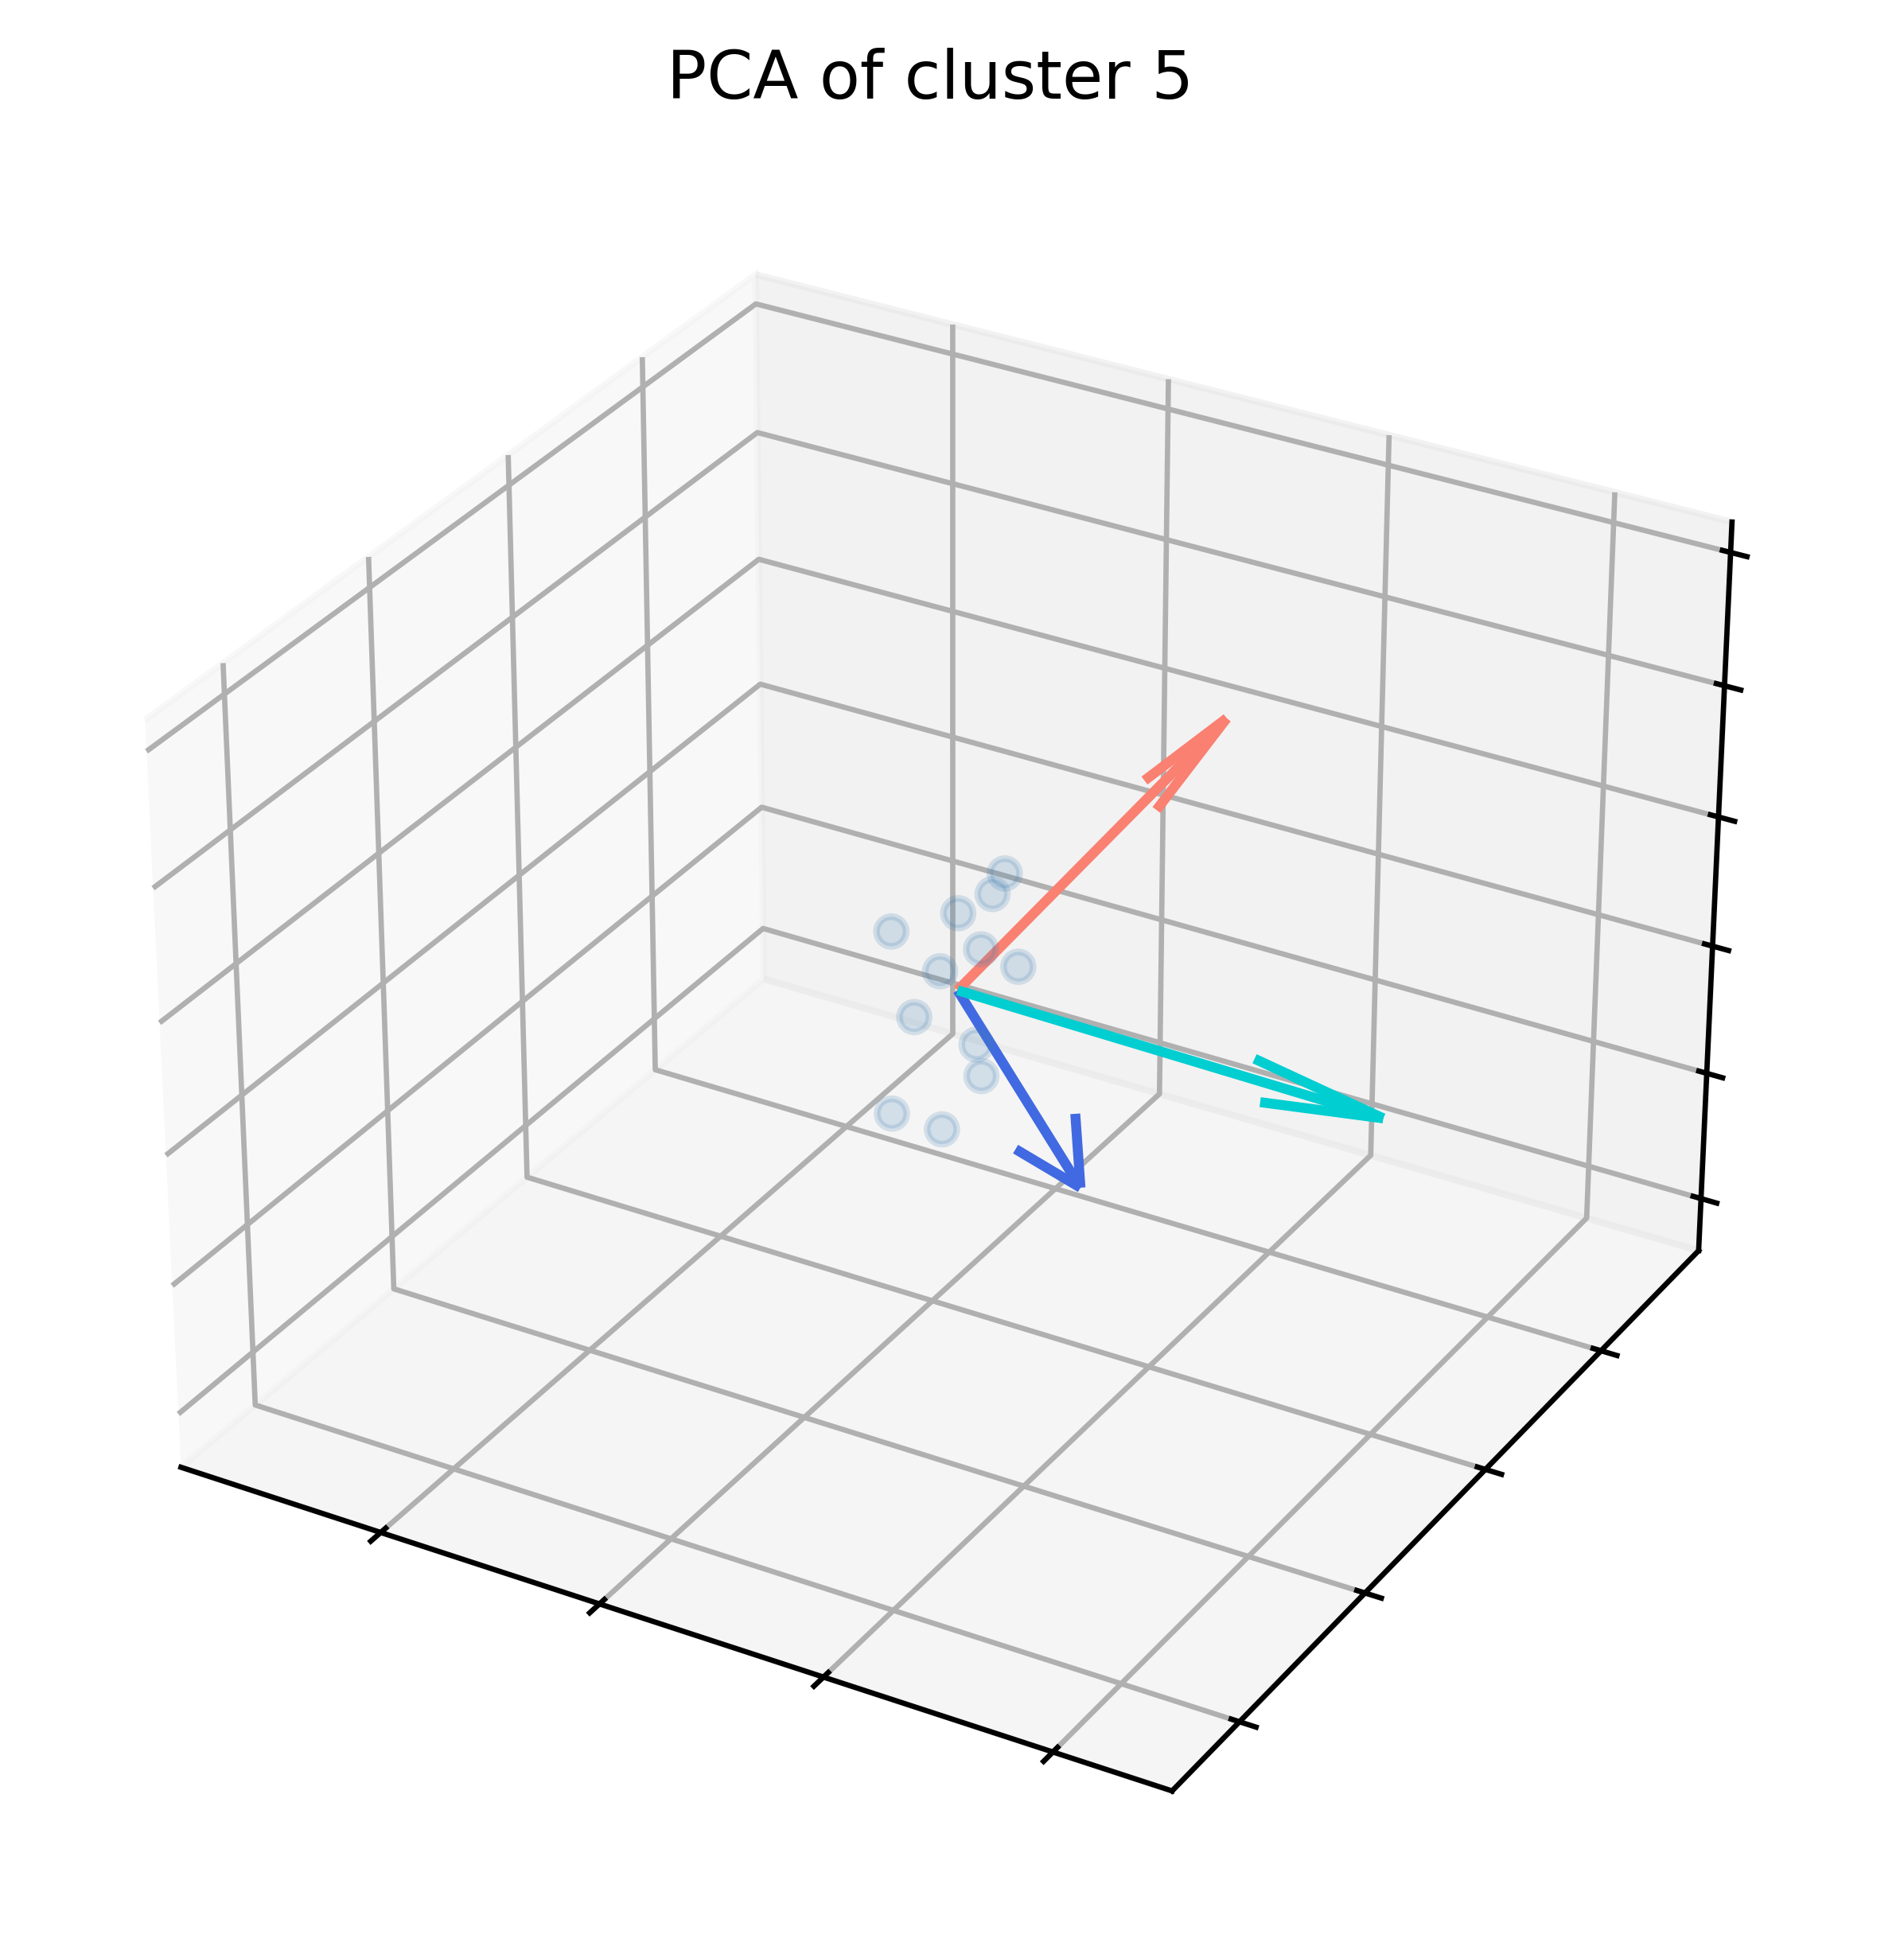

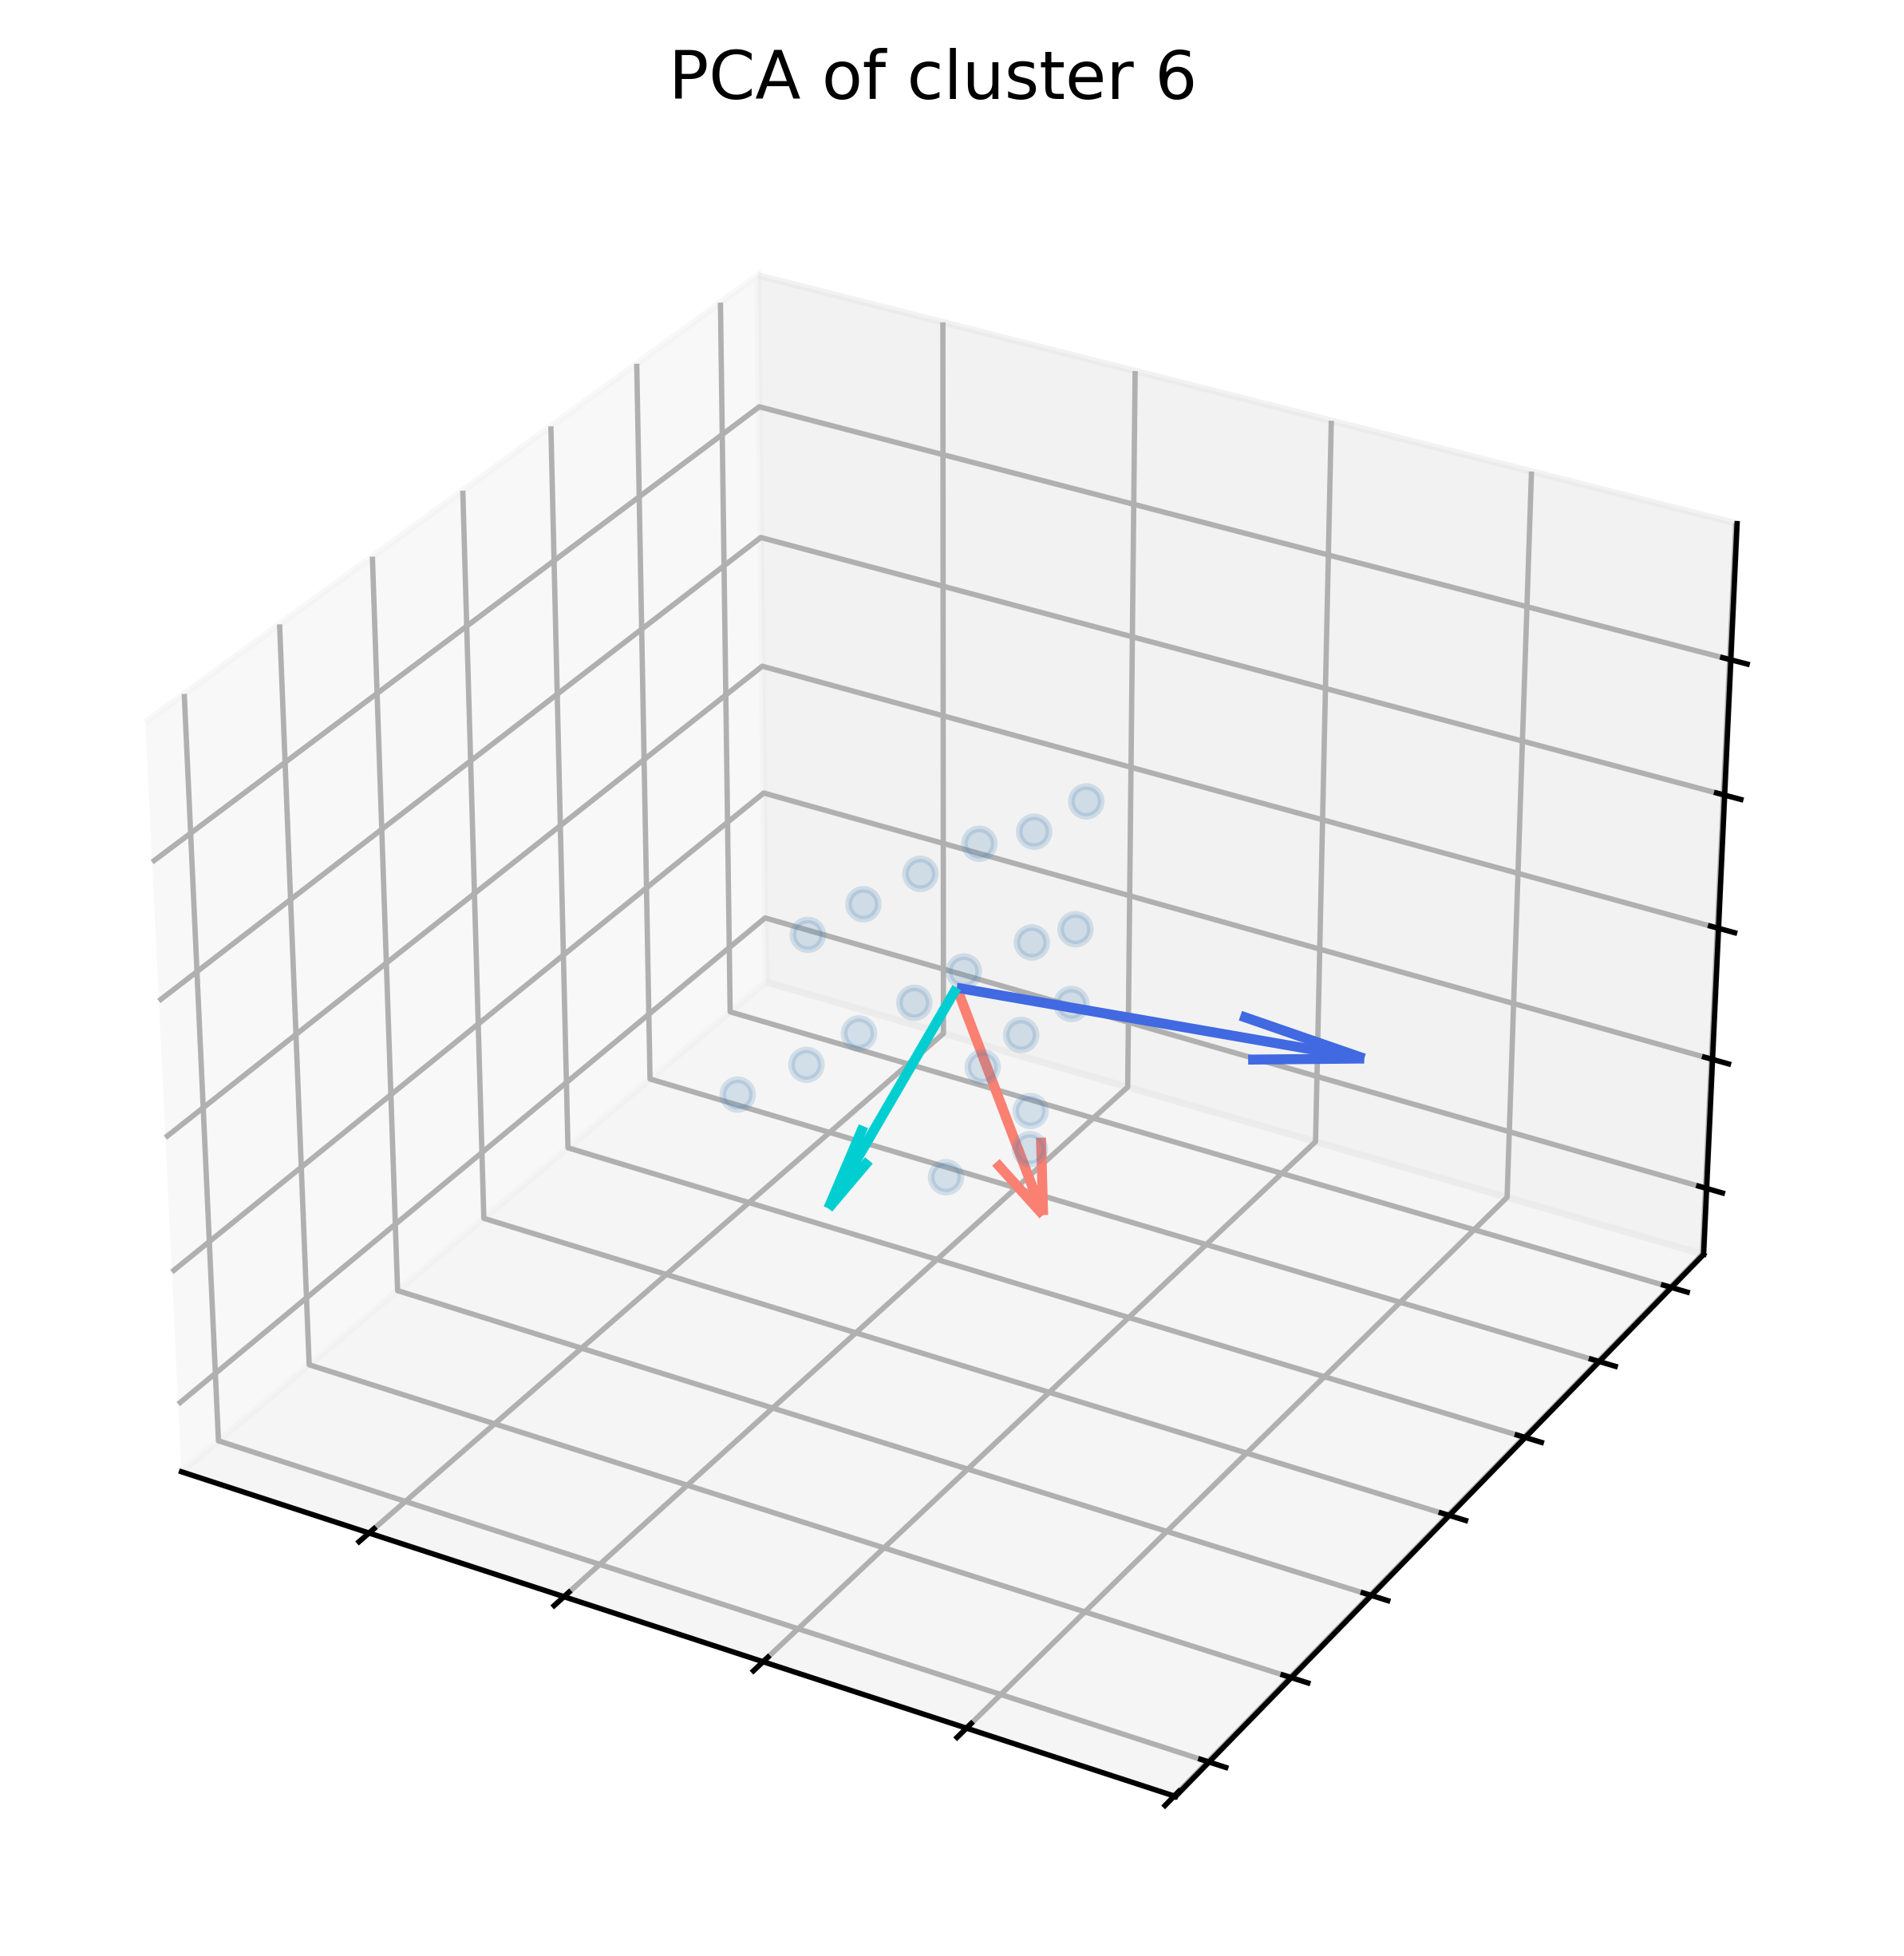

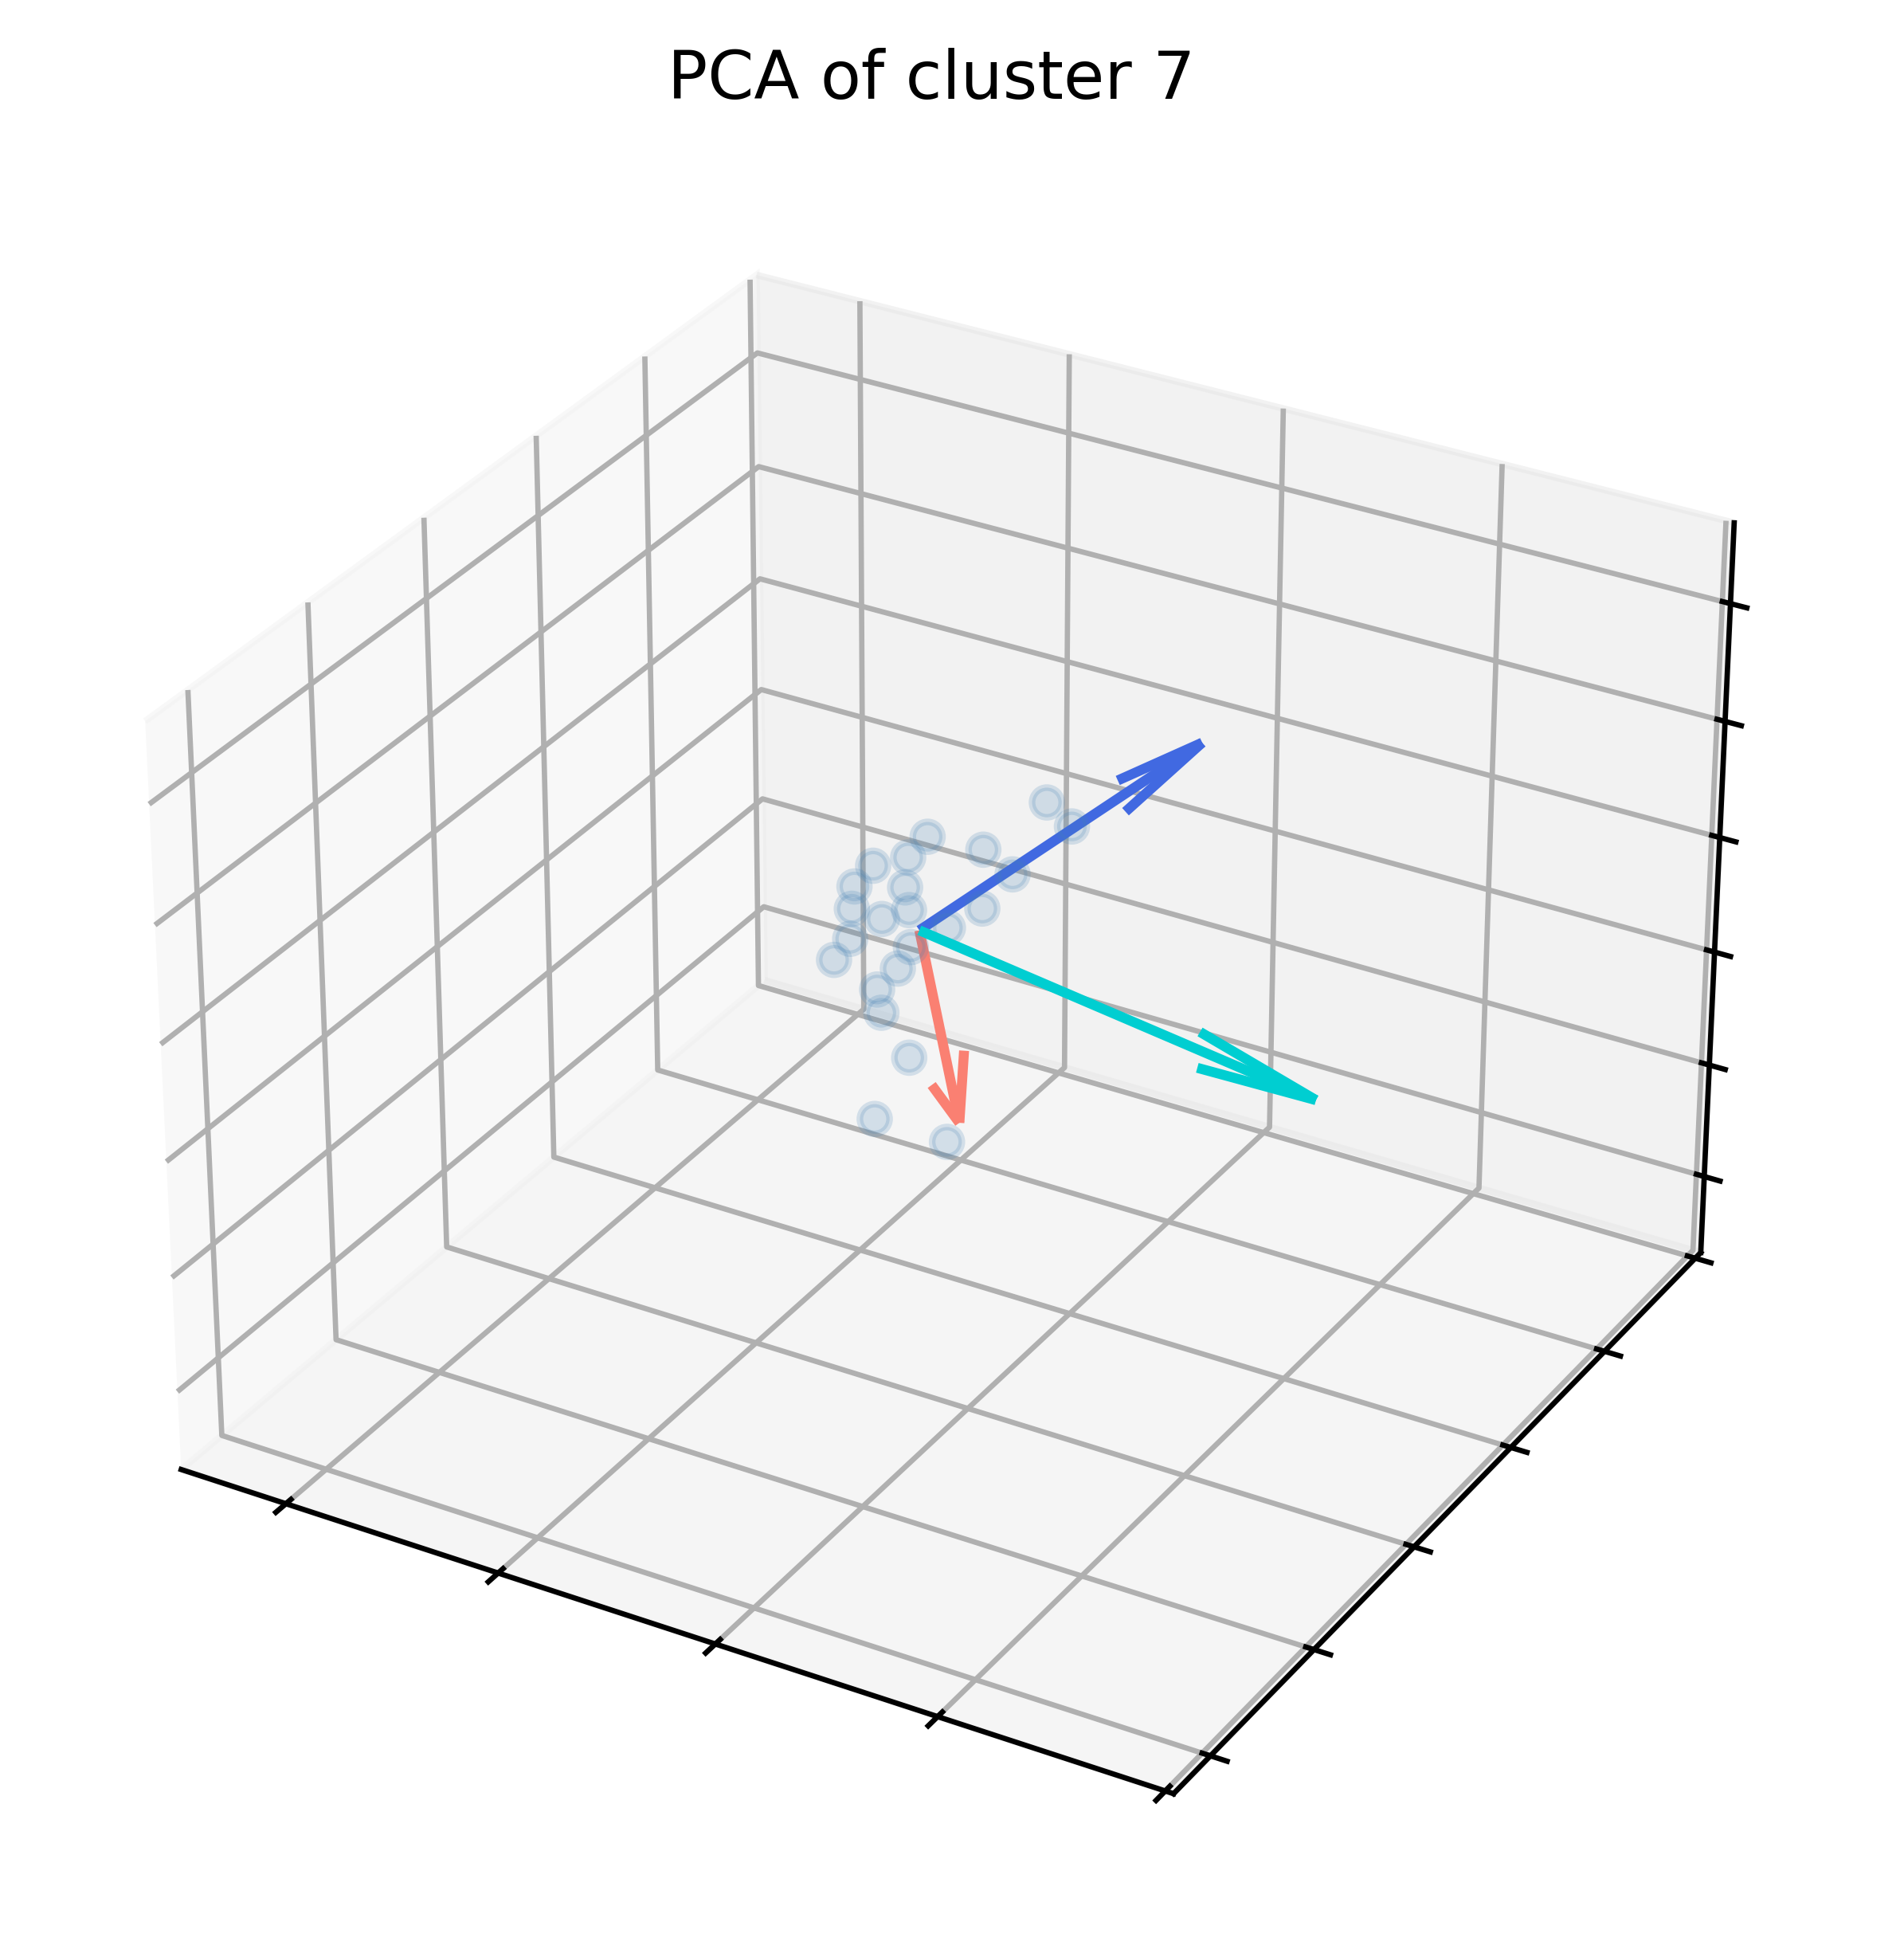

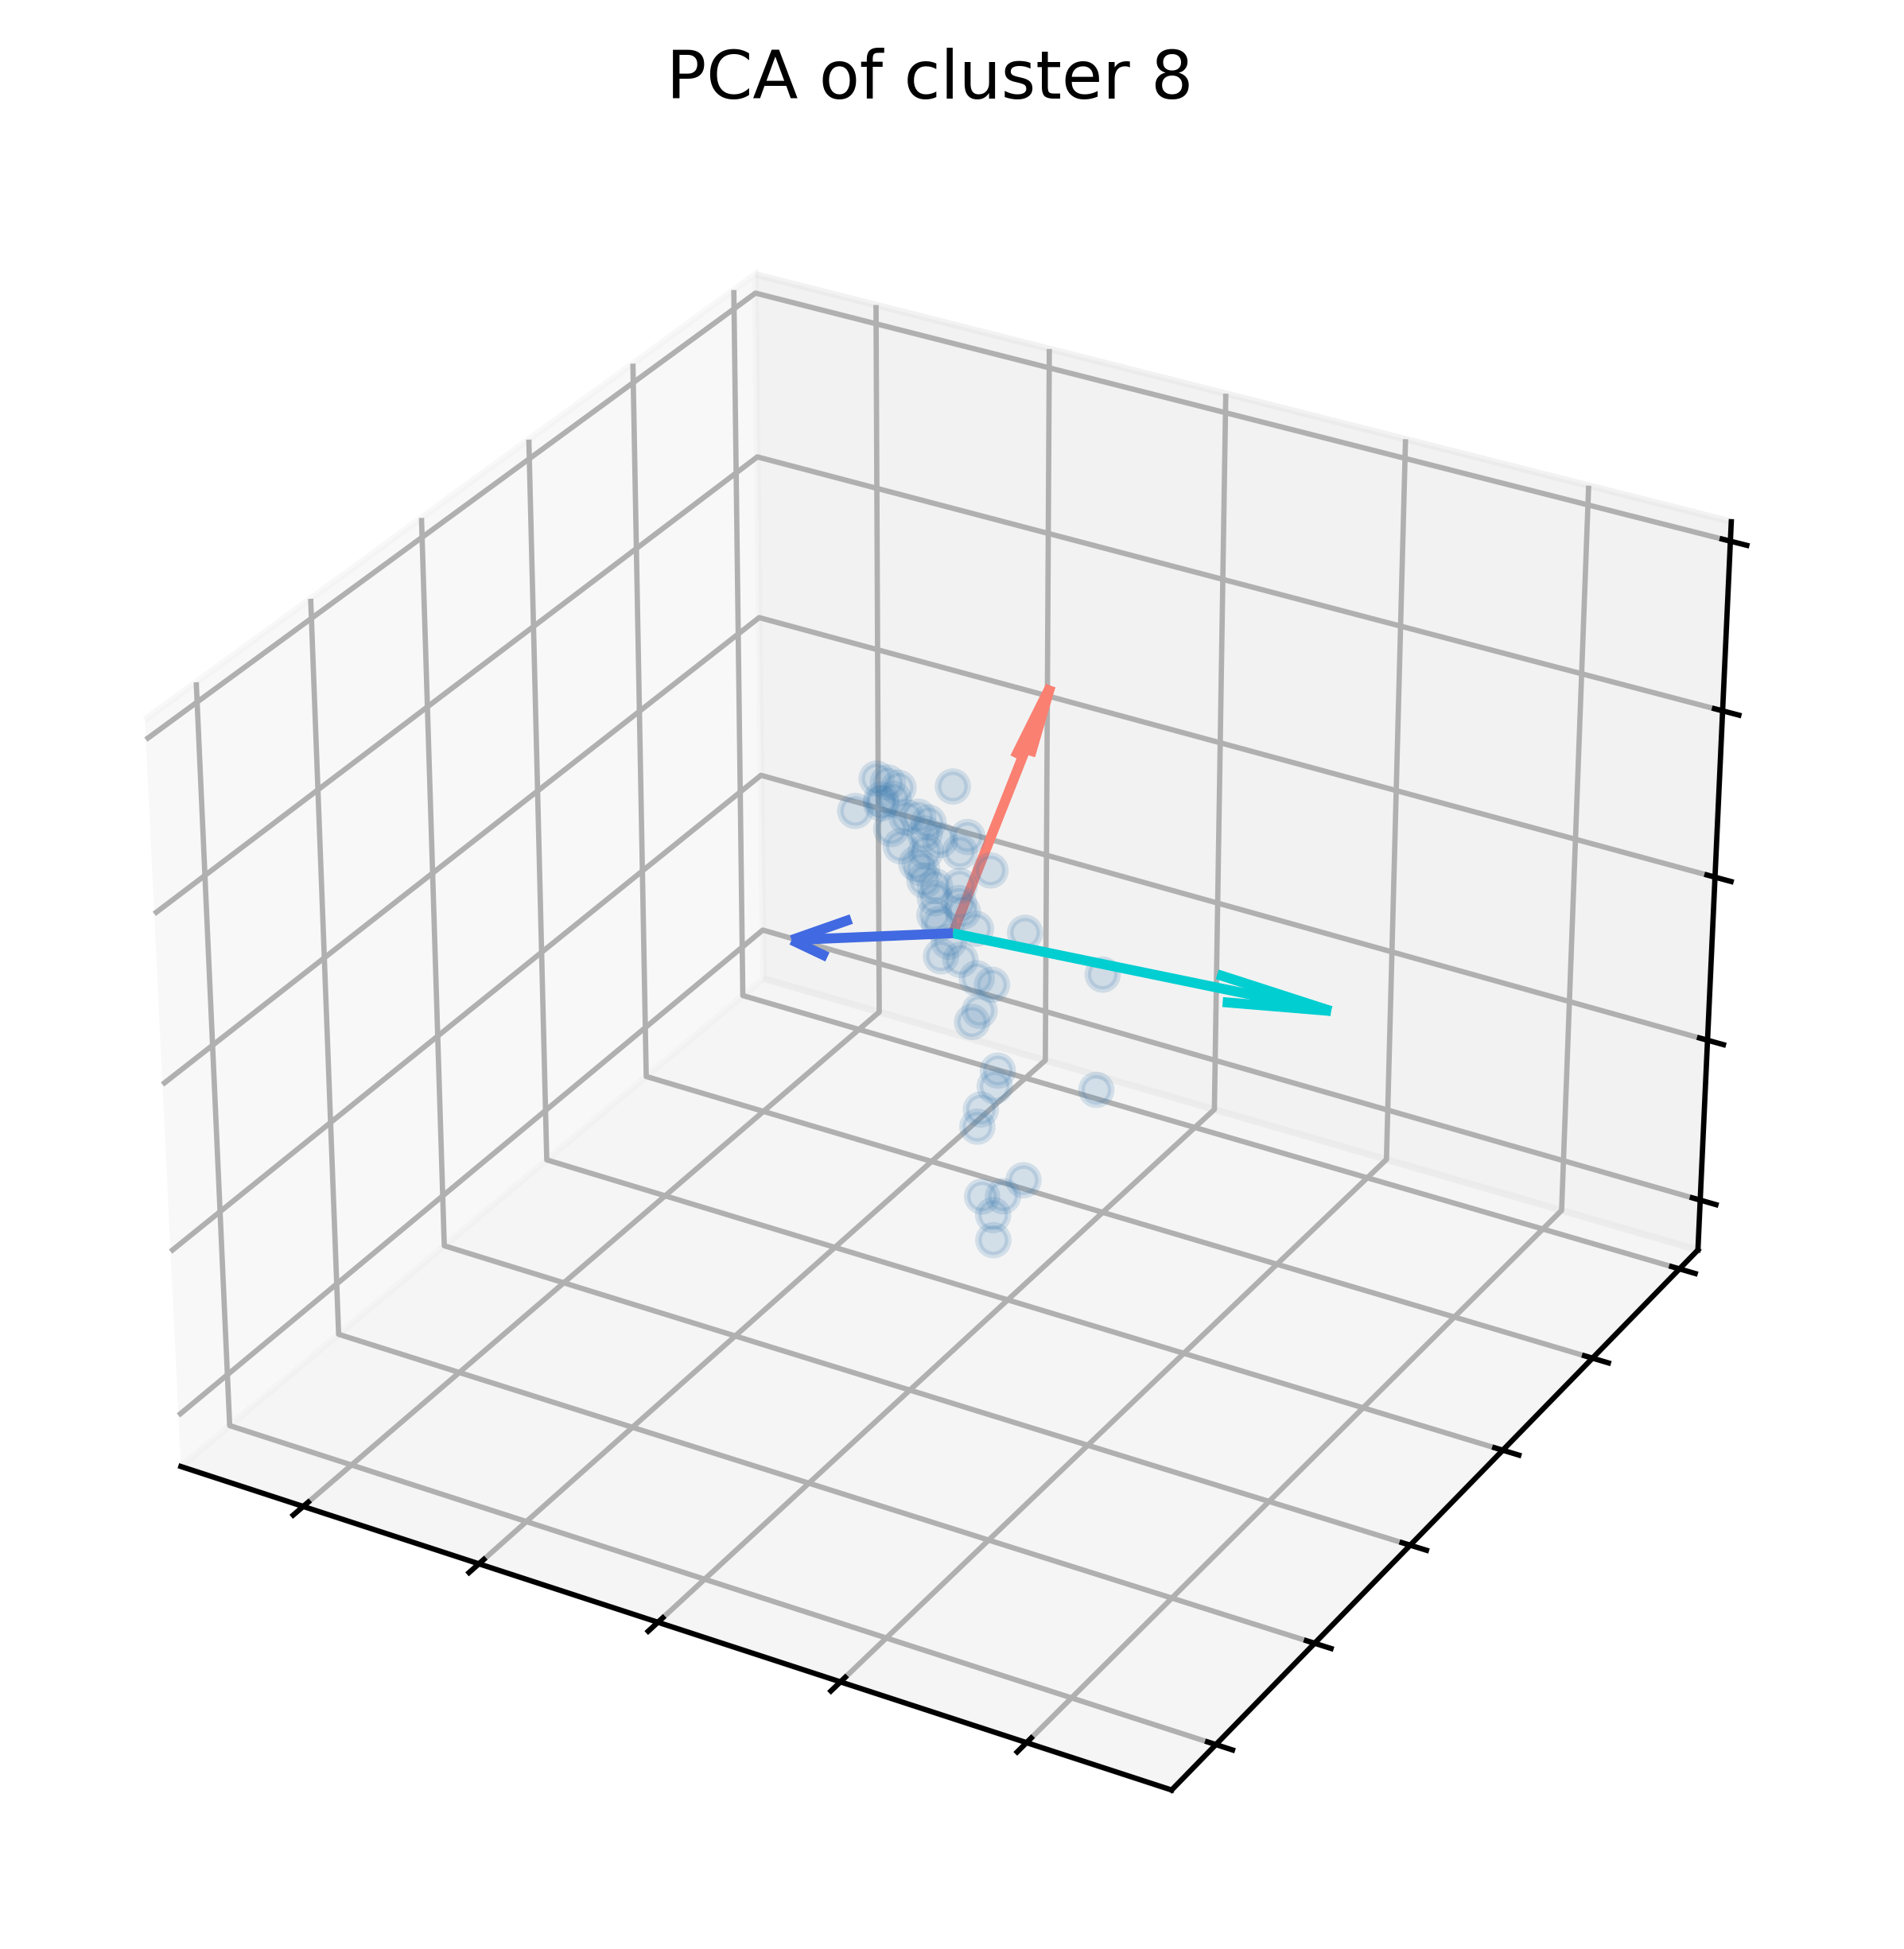

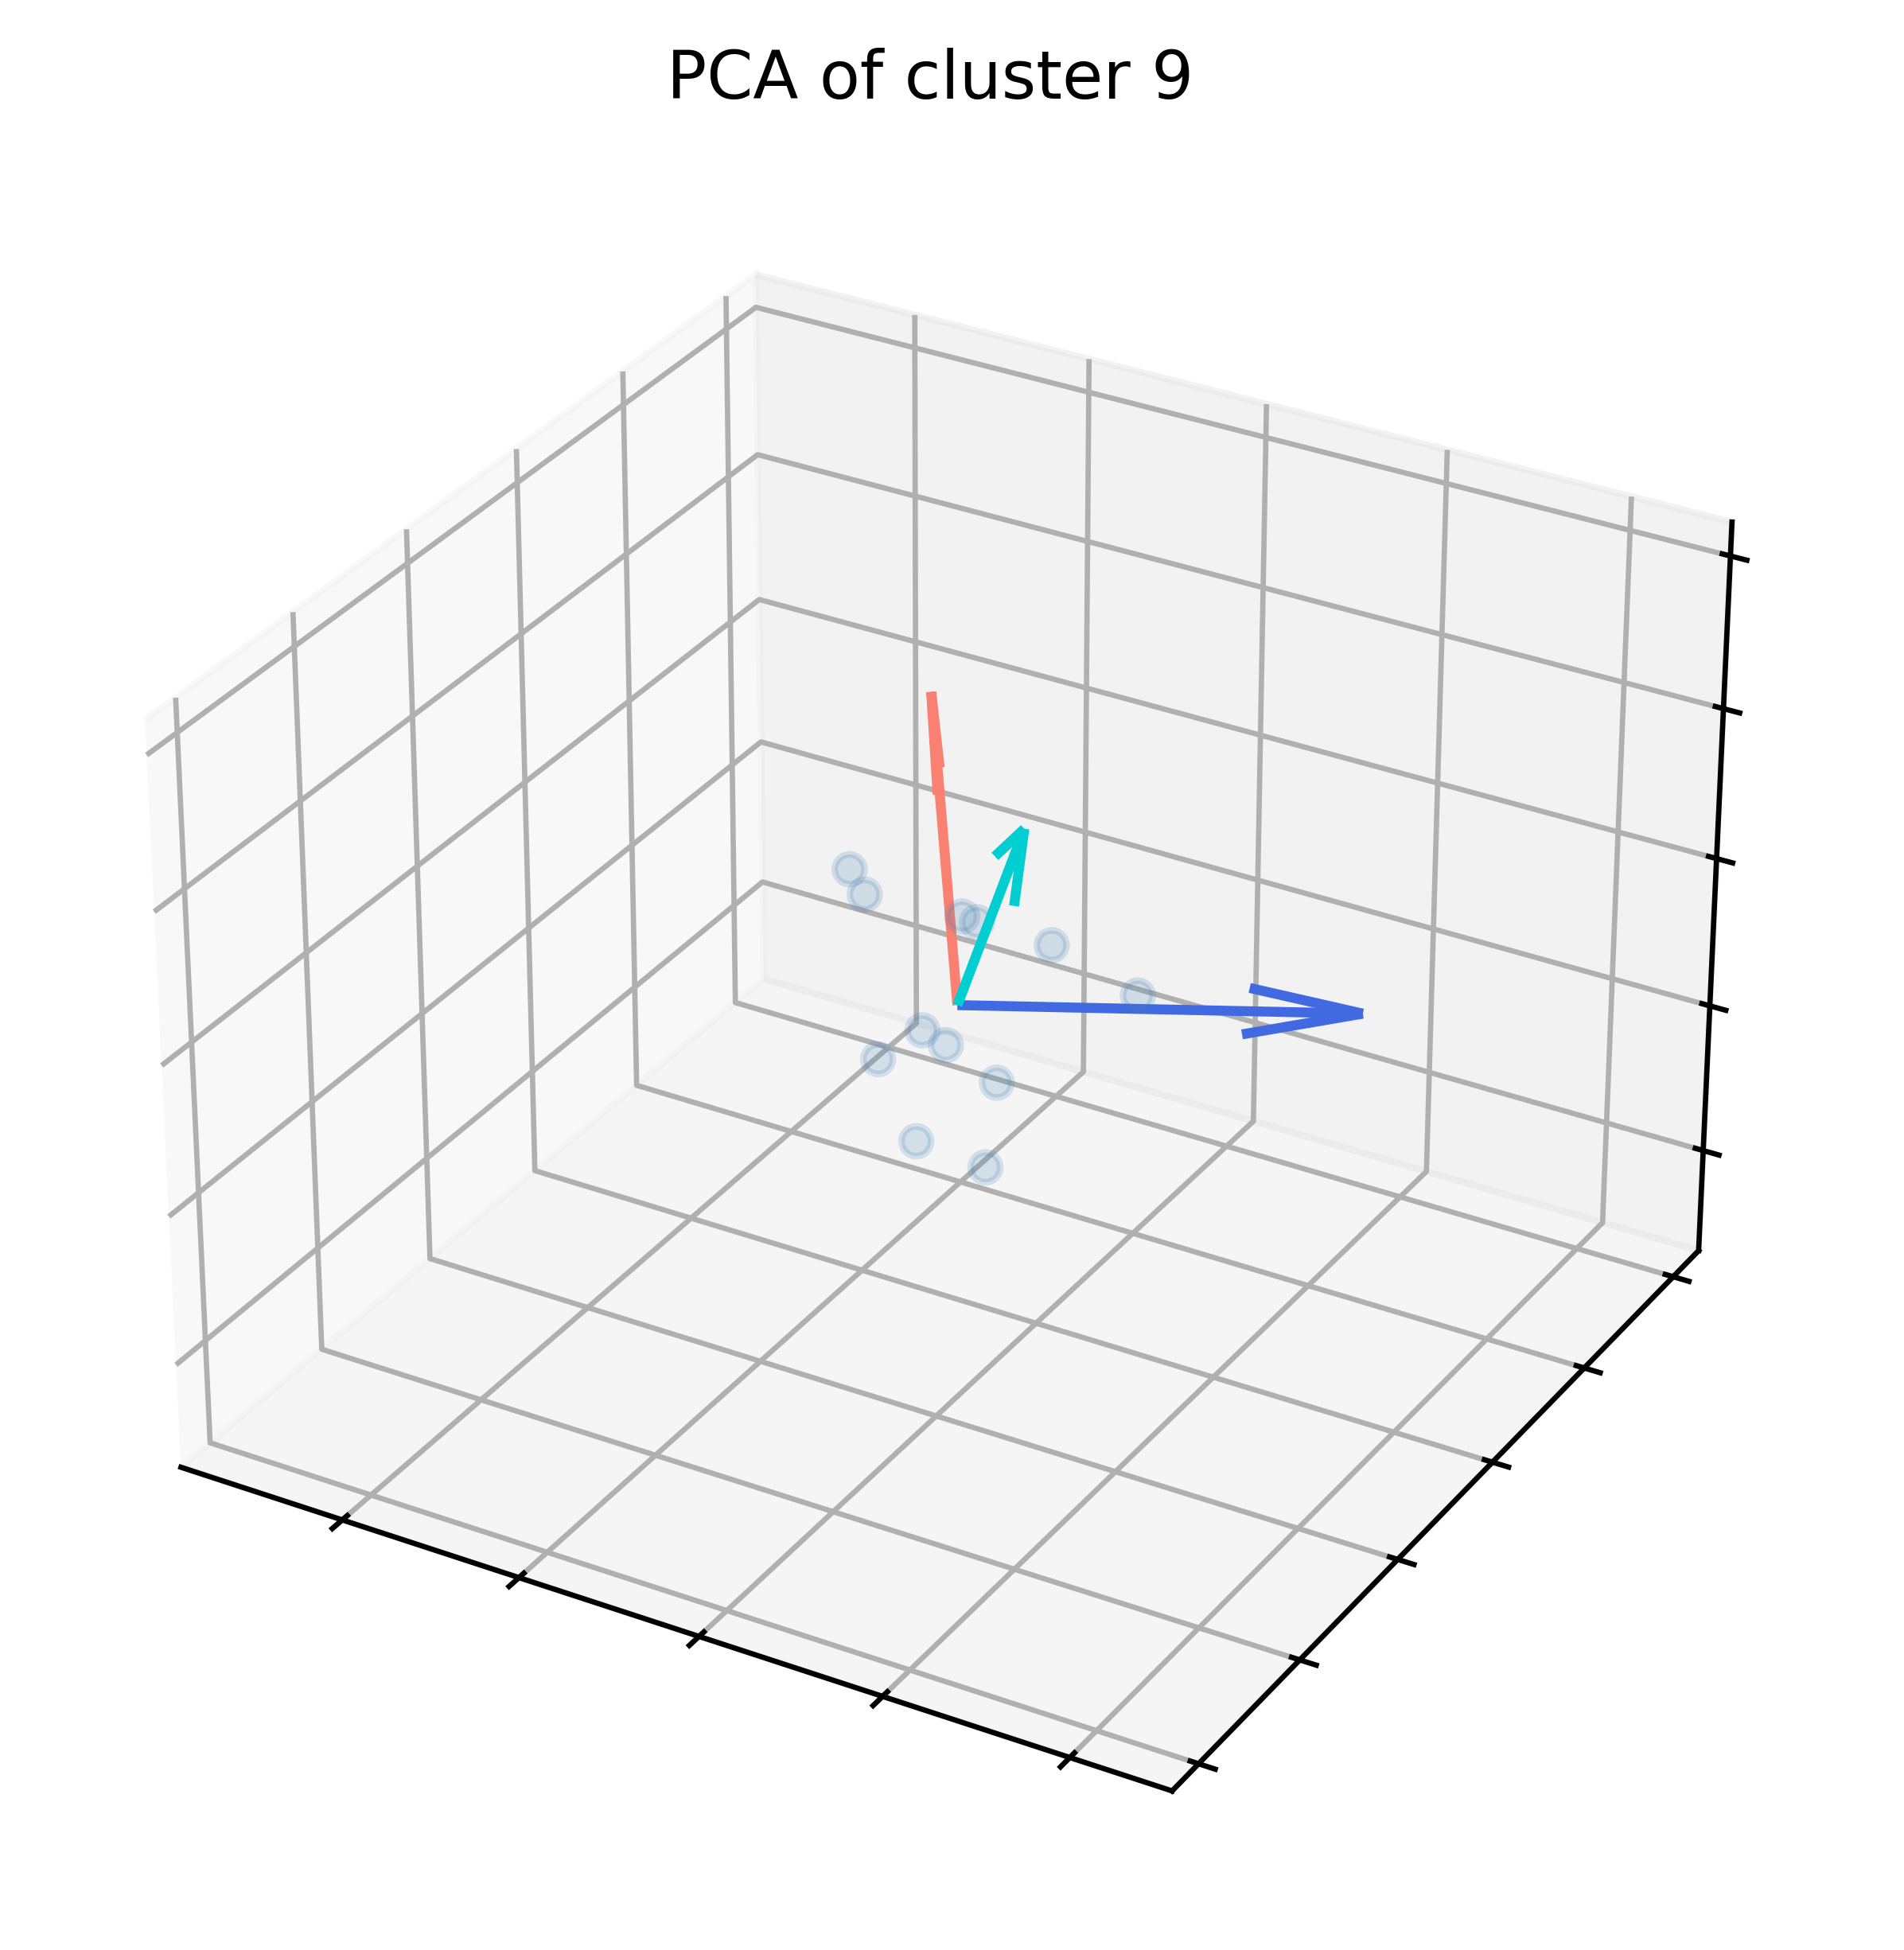

In [26]:
for i in range(10):
    cluster = segments.get_group(i)[['X', 'Y', 'Z']]
    DrawPCA(cluster, i)
    plt.savefig("outputs/PCA_of_cluster_"+str(i)+'.png', dpi=600)


### Loop to extract Eigen Values and Normals

In [28]:
# Add columns
pc['eigen_1'], pc['eigen_2'], pc['eigen_3'] = 0,0,0
pc['nx'], pc['ny'], pc['nz'] = 0,0,0

t_start = time.time()
for i in range(len(segments)):
    cluster = segments.get_group(i)[['X', 'Y', 'Z']]
    eigen_val, eigen_vec = CalcPCA(cluster)
    # Locate rows and columns to change
    pc.loc[cluster.index.values, ['eigen_1','eigen_2','eigen_3']] = eigen_val[0], eigen_val[1], eigen_val[2] 
    pc.loc[cluster.index.values, ['nx','ny','nz']] = eigen_vec[2][0], eigen_vec[2][1], eigen_vec[2][2] 

t_end = time.time()
print(f"Time at attribute PCA features to segments took {t_end - t_start} seconds")

C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\1371859638.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  cluster = segments.get_group(i)[['X', 'Y', 'Z']]
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\1371859638.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2012.117704647192' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pc.loc[cluster.index.values, ['eigen_1','eigen_2','eigen_3']] = eigen_val[0], eigen_val[1], eigen_val[2]
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\1371859638.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '768.2579629400607' has dtype incompatible with int64, please explicitly cast to a

Time at attribute PCA features to segments took 0.6374912261962891 seconds


C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\1371859638.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  cluster = segments.get_group(i)[['X', 'Y', 'Z']]
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\1371859638.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  cluster = segments.get_group(i)[['X', 'Y', 'Z']]
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\1371859638.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  cluster = segments.get_group(i)[['X', 'Y', 'Z']]
C:\Users\Jari\AppData\Local\Temp\ipykernel_38088\137185963

### Export

In [29]:
pc.to_csv("outputs/lidar_PCA_results.xyz", float_format="%1.9f", index=False)